In [1]:
## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree



# Import necessary libs

import os
import random as rnd
import pandas as pd
import numpy as np
import itertools
import gc
import networkx as nx
from sklearn import metrics
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree

## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

## Selección de Variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Validación Cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import necessary libs

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis

# Crea una semilla cualesquiera
seed = 16
np.random.seed(seed)

# Preprocesar label
from sklearn import preprocessing

In [3]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

**Leer los datos del negocio**

In [4]:
## data 
dataset = pd.read_excel('ventas_sebastian.xlsx')
mproductos = pd.read_excel('Maestro_productos.xlsx')
mcanales = pd.read_excel('Maestro_tratamiento.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Oficina de ventas            13755 non-null  object 
 1   Supervisor (Histórico)       13755 non-null  object 
 2   Vendedor (ZV)                13755 non-null  object 
 3   Solicitante                  13755 non-null  object 
 4   Unnamed: 4                   13755 non-null  object 
 5   Material                     13755 non-null  object 
 6   Unnamed: 6                   13755 non-null  object 
 7   Mes natural                  13755 non-null  object 
 8   Año natural                  13755 non-null  int64  
 9   Tratamiento Comercial        13755 non-null  object 
 10  Unnamed: 10                  6881 non-null   object 
 11  
Cantidad Facturada (SD-F)   12792 non-null  float64
 12  
Total Descuentos (SD-F)     1642 non-null   float64
 13  
Facturación Net

In [5]:
#Dimensión de la base de datos original
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Oficina de ventas            13755 non-null  object 
 1   Supervisor (Histórico)       13755 non-null  object 
 2   Vendedor (ZV)                13755 non-null  object 
 3   Solicitante                  13755 non-null  object 
 4   Unnamed: 4                   13755 non-null  object 
 5   Material                     13755 non-null  object 
 6   Unnamed: 6                   13755 non-null  object 
 7   Mes natural                  13755 non-null  object 
 8   Año natural                  13755 non-null  int64  
 9   Tratamiento Comercial        13755 non-null  object 
 10  Unnamed: 10                  6881 non-null   object 
 11  
Cantidad Facturada (SD-F)   12792 non-null  float64
 12  
Total Descuentos (SD-F)     1642 non-null   float64
 13  
Facturación Net

In [6]:
#dataset[dataset['Ano'] == "2017"].head(100)

# Tratamiento de datos

## Tratamiento de valores nulos

In [7]:
print("Número de observaciones = {}".format(dataset.shape[0]))
print("Total de variables disponibles = {}".format(dataset.columns.shape[0]))
print("Columnas que cuentan con algún valor nulo-")
print(dataset.isnull().sum())

Número de observaciones = 13755
Total de variables disponibles = 16
Columnas que cuentan con algún valor nulo-
Oficina de ventas                   0
Supervisor (Histórico)              0
Vendedor (ZV)                       0
Solicitante                         0
Unnamed: 4                          0
Material                            0
Unnamed: 6                          0
Mes natural                         0
Año natural                         0
Tratamiento Comercial               0
Unnamed: 10                      6874
\nCantidad Facturada (SD-F)       963
\nTotal Descuentos (SD-F)       12113
\nFacturación Neta SF (SD-F)     3252
\nCuota de venta                12887
\n% Cumplimiento                13755
dtype: int64


In [8]:
dataset = dataset.fillna(0)
dataset

Oficina de ventas   Supervisor (Histórico)         Vendedor (ZV)  \
0            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
1            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
2            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
3            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
4            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
...                     ...                      ...                   ...   
13750  Of.QS F&C Ayacu-Huan     FRANK RUBEN ESPINOZA  ROMEL ALCIDES LLACSA   
13751        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13752        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13753        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13754        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   

      Solicitante                   Unnamed: 4 Material  \
0          357193    (I)MARCO ALDANY PERU S.A.   536696   
1          357193    (I)MARCO ALDANY PERU S.A.   536696   
2          357193    (I)MARCO ALDANY PERU S.A.   536706   
3          357193    (I)MARCO ALDANY PERU S.A.   536706   
4          357193    (I)MARCO ALDANY PERU S.A.   536706   
...           ...                          ...      ...   
13750      448738  FIGARO PELUQUERIAS E.I.R.L.   568297   
13751           #                  Sin asignar        #   
13752           #                  Sin asignar        #   
13753           #                  Sin asignar        #   
13754           #                  Sin asignar        #   

                          Unnamed: 6 Mes natural  Año natural  \
0            SEB SHAPER FIERCE 400ML       Enero         2017   
1            SEB SHAPER FIERCE 400ML       Enero         2017   
2      SEB PENETRAITT SHAMPOO 1000ML       Enero         2017   
3      SEB PENETRAITT SHAMPOO 1000ML       Enero         2017   
4      SEB PENETRAITT SHAMPOO 1000ML     Febrero         2017   
...                              ...         ...          ...   
13750        SEBMAN PLAYER GEL 150ML   Diciembre         2020   
13751                    Sin asignar        Mayo         2020   
13752                    Sin asignar        Mayo         2020   
13753                    Sin asignar       Junio         2020   
13754                    Sin asignar       Junio         2020   

      Tratamiento Comercial           Unnamed: 10  \
0                        62    Salones de Belleza   
1                 Resultado                     0   
2                        62    Salones de Belleza   
3                 Resultado                     0   
4                        62    Salones de Belleza   
...                     ...                   ...   
13750             Resultado                     0   
13751                     #  OTROS CANALES TRADIC   
13752             Resultado                     0   
13753                     #  OTROS CANALES TRADIC   
13754             Resultado                     0   

       \nCantidad Facturada (SD-F)  \nTotal Descuentos (SD-F)  \
0                              1.0                     -22.16   
1                              1.0                     -22.16   
2                              2.0                     -83.04   
3                              2.0                     -83.04   
4                              1.0                     -41.52   
...                            ...                        ...   
13750                        -48.0                       0.00   
13751                          0.0                       0.00   
13752                          0.0                       0.00   
13753                          0.0                       0.00   
13754                          0.0                       0.00   

       \nFacturación Neta SF (SD-F)  \nCuota de venta  \n% Cumplimiento  
0                             33.24              0.00               0.0  
1                

In [9]:
print(dataset.isnull().sum())

Oficina de ventas               0
Supervisor (Histórico)          0
Vendedor (ZV)                   0
Solicitante                     0
Unnamed: 4                      0
Material                        0
Unnamed: 6                      0
Mes natural                     0
Año natural                     0
Tratamiento Comercial           0
Unnamed: 10                     0
\nCantidad Facturada (SD-F)     0
\nTotal Descuentos (SD-F)       0
\nFacturación Neta SF (SD-F)    0
\nCuota de venta                0
\n% Cumplimiento                0
dtype: int64


# Transformación de datos

In [10]:
#Cambio de nombres de columnas
dataset.rename(columns={'Oficina de ventas':'Oficina_ventas'},inplace = True)
dataset.rename(columns={'Supervisor (Histórico)':'Nombre_Supervisor'},inplace = True)
dataset.rename(columns={'Vendedor (ZV)':'Nombre_Vendedor'},inplace = True)
dataset.rename(columns={'Solicitante':'Cod_solicitante'},inplace = True)
dataset.rename(columns={'Unnamed: 4':'Solicitante'},inplace = True)
dataset.rename(columns={'Material':'Cod_producto'},inplace = True)
dataset.rename(columns={'Unnamed: 6':'Producto'},inplace = True)
dataset.rename(columns={'Mes natural':'Mes'},inplace = True)
dataset.rename(columns={'Año natural':'Ano'},inplace = True)
dataset.rename(columns={'Tratamiento Comercial':'Cod_tratamiento'},inplace = True)
dataset.rename(columns={'Unnamed: 10':'Tratamiento_comercial1'},inplace = True)
dataset.rename(columns={'\nCantidad Facturada (SD-F)':'Cant_facturada'},inplace = True)
dataset.rename(columns={'\nTotal Descuentos (SD-F)':'Total_descuentos'},inplace = True)
dataset.rename(columns={'\nFacturación Neta SF (SD-F)':'Facturacion_neta'},inplace = True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          13755 non-null  object 
 1   Nombre_Supervisor       13755 non-null  object 
 2   Nombre_Vendedor         13755 non-null  object 
 3   Cod_solicitante         13755 non-null  object 
 4   Solicitante             13755 non-null  object 
 5   Cod_producto            13755 non-null  object 
 6   Producto                13755 non-null  object 
 7   Mes                     13755 non-null  object 
 8   Ano                     13755 non-null  int64  
 9   Cod_tratamiento         13755 non-null  object 
 10  Tratamiento_comercial1  13755 non-null  object 
 11  Cant_facturada          13755 non-null  float64
 12  Total_descuentos        13755 non-null  float64
 13  Facturacion_neta        13755 non-null  float64
 14  
Cuota de venta         13755 non-null

In [11]:
#Tratamiento de datos que aplican en el area de ventas
dataset = dataset.drop(dataset[dataset['Cod_tratamiento']=="Resultado"].index) #eliminamos errores de SAP
dataset = dataset.drop(dataset[dataset['Cod_producto']=="#"].index) #eliminamos errores de SAP
dataset = dataset.drop(['\nCuota de venta','\n% Cumplimiento'], axis=1) #eliminamos columnas que no se usan
dataset["Tratamiento_comercial1"] = dataset["Tratamiento_comercial1"].str.lower() #unificamos errores de escritura de tratamiento comercial
dataset['Cod_producto']= pd.to_numeric(dataset['Cod_producto'])
mproductos.rename(columns={'CODIGO QS':'Cod_producto'},inplace = True)
dataset = pd.merge(left=dataset,right=mproductos, how='left', left_on='Cod_producto', right_on='Cod_producto') #agregamos columnas del maestro de productos
dataset = dataset.drop(['DESCRIPCIÓN DEL PRODUCTO','COSTO UNITARIO'], axis=1) #borramos columnas que no nocesitamos
mcanales.rename(columns={'Tratamiento comercial 1':'Tratamiento_comercial1'},inplace = True)
mcanales["Tratamiento_comercial1"] = mcanales["Tratamiento_comercial1"].str.lower() #unificamos errores de escritura de tratamiento comercial
dataset = pd.merge(left=dataset,right=mcanales, how='left', left_on='Tratamiento_comercial1', right_on='Tratamiento_comercial1') #agregamos columnas del maestro de productos
dataset.rename(columns={'Tratamiento comercial 2':'Canales'},inplace = True)
dataset['Total_descuentos'] = dataset['Total_descuentos'].abs()
dataset["Cod_producto"] = dataset["Cod_producto"].astype(str) 
dataset["Cod_solicitante"] = dataset["Cod_solicitante"].astype(str) 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   int64  
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

In [12]:

#Realizamos cambios en la data y creamos columnas para facilitar el analisis
dataset['Mes'] = dataset['Mes'].replace(['Enero'],'01')
dataset['Mes'] = dataset['Mes'].replace(['Febrero'],'02')
dataset['Mes'] = dataset['Mes'].replace(['Marzo'],'03')
dataset['Mes'] = dataset['Mes'].replace(['Abril'],'04')
dataset['Mes'] = dataset['Mes'].replace(['Mayo'],'05')
dataset['Mes'] = dataset['Mes'].replace(['Junio'],'06')
dataset['Mes'] = dataset['Mes'].replace(['Julio'],'07')
dataset['Mes'] = dataset['Mes'].replace(['Agosto'],'08')
dataset['Mes'] = dataset['Mes'].replace(['Septiembre'],'09')
dataset['Mes'] = dataset['Mes'].replace(['Octubre'],'10')
dataset['Mes'] = dataset['Mes'].replace(['Noviembre'],'11')
dataset['Mes'] = dataset['Mes'].replace(['Diciembre'],'12')

#dataset['COVID'] = dataset['Mes'].replace(['Diciembre'],'12')
#dataset['Mes']= dataset['Mes'].astype('string')
#dataset['Ano']= dataset['Ano'].astype('string')
#dataset['Cod_producto']= dataset['Cod_producto'].astype('string')




dataset

dataset['Ano']=dataset['Ano'].replace("[,""]","", regex=True)
dataset['Ano']= dataset['Ano'].astype(str)
dataset['Ano_Mes'] = dataset['Ano']+dataset['Mes']
dataset['Ano_Mes']= dataset['Ano_Mes'].astype(int)
#dataset['Cerrado_COVID'] = ["1" if x == 202003 or x == 202004 or x == 202005 or x == 202006 else "0" for x in dataset['Ano_Mes']]
#dataset['Covid'] = ["1" if x >=202003 else "0" for x in dataset['Ano_Mes']] 
#dataset['Mes']= dataset['Mes'].astype('string')
#dataset['Ano']= dataset['Ano'].astype('string')
#dataset['Cod_producto']= dataset['Cod_producto'].astype('string')

dataset.reset_index()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   object 
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

In [1]:
dataset['id_venta'] = dataset['Ano']+dataset['Mes']+dataset['Cod_solicitante']

dataset.info()

NameError: name 'dataset' is not defined

### Diferenciacion de data

In [14]:
########################3dataset = dataset.drop_duplicates()
dataset

Oficina_ventas               Nombre_Supervisor  \
0           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
1           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
2           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
3           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
4           Of.QS F&C Lima            VIRGINIA LUCIA BAYLY   
...                    ...                             ...   
6550  Of.QS F&C Junin-Pasc            JUAN CARLOS MARTINEZ   
6551  Of.QS F&C Junin-Pasc            JUAN CARLOS MARTINEZ   
6552  Of.QS F&C Cajam-Amaz  CARLOS ENRIQUE VASQUEZ HURTADO   
6553  Of.QS F&C Ayacu-Huan            FRANK RUBEN ESPINOZA   
6554  Of.QS F&C Ayacu-Huan            FRANK RUBEN ESPINOZA   

                     Nombre_Vendedor Cod_solicitante  \
0                DANIEL ALONSO TELLO          357193   
1                DANIEL ALONSO TELLO          357193   
2                DANIEL ALONSO TELLO          357193   
3                DANIEL ALONSO TELLO          357193   
4                DANIEL ALONSO TELLO          357193   
...                              ...             ...   
6550                      CIRO PRADO          452268   
6551                      CIRO PRADO          452268   
6552  ROSMERY YANINA JULCA CASTAÑEDA          333423   
6553            ROMEL ALCIDES LLACSA          448738   
6554            ROMEL ALCIDES LLACSA          448738   

                        Solicitante Cod_producto  \
0         (I)MARCO ALDANY PERU S.A.       536696   
1         (I)MARCO ALDANY PERU S.A.       536706   
2         (I)MARCO ALDANY PERU S.A.       536706   
3         (I)MARCO ALDANY PERU S.A.       536706   
4         (I)MARCO ALDANY PERU S.A.       536706   
...                             ...          ...   
6550        RODRIGUEZ SALAZAR RONNY       220302   
6551        RODRIGUEZ SALAZAR RONNY       221183   
6552  AGUERO OLIVOS DOMINGO ANTONIO       536720   
6553    FIGARO PELUQUERIAS E.I.R.L.       568297   
6554    FIGARO PELUQUERIAS E.I.R.L.       568297   

                           Producto Mes   Ano Cod_tratamiento  \
0           SEB SHAPER FIERCE 400ML  01  2017              62   
1     SEB PENETRAITT SHAMPOO 1000ML  01  2017              62   
2     SEB PENETRAITT SHAMPOO 1000ML  02  2017              62   
3     SEB PENETRAITT SHAMPOO 1000ML  03  2017              62   
4     SEB PENETRAITT SHAMPOO 1000ML  04  2017              62   
...                             ...  ..   ...             ...   
6550           PACK SEBASTIAN HYDRE  12  2020              AD   
6551      PACK SEBASTIAN PENETRAITT  12  2020              AD   
6552    SEB POTION 9 STYL TRT 150ML  01  2020              AR   
6553        SEBMAN PLAYER GEL 150ML  08  2020              AR   
6554        SEBMAN PLAYER GEL 150ML  12  2020              AR   

     Tratamiento_comercial1  Cant_facturada  Total_descuentos  \
0        salones de belleza             1.0             22.16   
1        salones de belleza             2.0             83.04   
2        salones de belleza             1.0             41.52   
3        salones de belleza             1.0             41.52   
4        salones de belleza             2.0             83.04   
...                     ...             ...               ...   
6550       farmacias indep.             1.0              0.00   
6551       farmacias indep.             1.0              0.00   
6552     salones de belleza             4.0              0.00   
6553     salones de belleza            96.0              0.00   
6554     salones de belleza           -48.0              0.00   

      Facturacion_neta   CATEGORIA     TIPO             Canales  Ano_Mes  \
0                33.24        FORM  AEROSOL  Salones de Belleza   201701   
1               124.56  FOUNDATION  SHAMPOO  Salones de Belleza   201701   
2                62.28  FOUNDATION  SHAMPOO  Salones de Belleza   201702   
3                62.28  FOUNDATION  SHAMPOO  Salones de Belleza   201703   
4               124.56  FOU

In [15]:
#Para crear el dataframe de ventas, retiramos los otros escenarios encontrados en el reporte como: rebates, devoluciones, regalos
ventas = dataset.drop(dataset[dataset['Cant_facturada'] <= 0 ].index) #eliminamos los rebates(sin cantidad) y devoluciones (cantidades negativas) para quedarnos solo con las ventas
ventas = ventas.drop(ventas[ventas['Facturacion_neta'] <= 1 ].index) #eliminamos los regalos promocionales (no generan ganancias)
ventas = ventas.drop(ventas[ventas['Ano'] != "2020" ].index)
ventas = ventas.drop(ventas[ventas['Canales'] != "Salones de Belleza" ].index)
ventas = ventas.drop(['Canales'], axis =1 )
ventas['Facturacion_neta'] = ventas['Facturacion_neta'].abs()
ventas['precio_venta_cd'] = ventas['Facturacion_neta']/ventas['Cant_facturada']
ventas['precio_venta_sd'] = (ventas['Facturacion_neta']+ ventas['Total_descuentos'])/ventas['Cant_facturada']

ventas2017 = ventas.drop(ventas[ventas['Ano'] != "2017" ].index)
ventas2017.info()

#ventas['ID_CORRELATIVO'] =   ventas['ID_CORRELATIVO'].apply(lambda x: '{0:0>7}'.format(x))
#ventas = ventas.sort_values(['ID_CORRELATIVO'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          0 non-null      object 
 1   Nombre_Supervisor       0 non-null      object 
 2   Nombre_Vendedor         0 non-null      object 
 3   Cod_solicitante         0 non-null      object 
 4   Solicitante             0 non-null      object 
 5   Cod_producto            0 non-null      object 
 6   Producto                0 non-null      object 
 7   Mes                     0 non-null      object 
 8   Ano                     0 non-null      object 
 9   Cod_tratamiento         0 non-null      object 
 10  Tratamiento_comercial1  0 non-null      object 
 11  Cant_facturada          0 non-null      float64
 12  Total_descuentos        0 non-null      float64
 13  Facturacion_neta        0 non-null      float64
 14  CATEGORIA               0 non-null      object 
 15  T

In [16]:
#Para crear el dataframe de devoluciones
devoluciones = dataset.drop(dataset[dataset['Cant_facturada'] >= 0 ].index)
devoluciones = devoluciones.drop(devoluciones[devoluciones['Facturacion_neta'] >= 0 ].index)
devoluciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 240 to 6554
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          105 non-null    object 
 1   Nombre_Supervisor       105 non-null    object 
 2   Nombre_Vendedor         105 non-null    object 
 3   Cod_solicitante         105 non-null    object 
 4   Solicitante             105 non-null    object 
 5   Cod_producto            105 non-null    object 
 6   Producto                105 non-null    object 
 7   Mes                     105 non-null    object 
 8   Ano                     105 non-null    object 
 9   Cod_tratamiento         105 non-null    object 
 10  Tratamiento_comercial1  105 non-null    object 
 11  Cant_facturada          105 non-null    float64
 12  Total_descuentos        105 non-null    float64
 13  Facturacion_neta        105 non-null    float64
 14  CATEGORIA               105 non-null   

In [17]:
#Para crear el dataframe de rebates
rebates = dataset.drop(dataset[dataset['Cant_facturada'] != 0 ].index)
rebates = rebates.drop(rebates[rebates['Facturacion_neta'] >= 1 ].index)
rebates=rebates.reset_index()
rebates=rebates.drop(['index'], axis=1)
rebates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          47 non-null     object 
 1   Nombre_Supervisor       47 non-null     object 
 2   Nombre_Vendedor         47 non-null     object 
 3   Cod_solicitante         47 non-null     object 
 4   Solicitante             47 non-null     object 
 5   Cod_producto            47 non-null     object 
 6   Producto                47 non-null     object 
 7   Mes                     47 non-null     object 
 8   Ano                     47 non-null     object 
 9   Cod_tratamiento         47 non-null     object 
 10  Tratamiento_comercial1  47 non-null     object 
 11  Cant_facturada          47 non-null     float64
 12  Total_descuentos        47 non-null     float64
 13  Facturacion_neta        47 non-null     float64
 14  CATEGORIA               46 non-null     obje

In [18]:
#Para crear el dataframe de devoluciones
promocional = dataset.drop(dataset[dataset['Facturacion_neta'] > 1 ].index)
promocional = promocional.drop(promocional[promocional['Cant_facturada'] < 0 ].index)



promocional.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
130  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
131  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
132  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
133  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
134  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
130          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
131          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
132          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       221091   
133          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   
134          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   

                  Producto Mes   Ano Cod_tratamiento Tratamiento_comercial1  \
130  BOLSA PAPEL SEBASTIAN  10  2020              AR     salones de belleza   
131  BOLSA PAPEL SEBASTIAN  12  2020              AR     salones de belleza   
132         CAPA SEBASTIAN  10  2020              AR     salones de belleza   
133       TOALLA SEBASTIAN  10  2020              AR     salones de belleza   
134       TOALLA SEBASTIAN  12  2020              AR     salones de belleza   

     Cant_facturada  Total_descuentos  Facturacion_neta CATEGORIA TIPO  \
130            60.0               0.0               0.0       POP  POP   
131            30.0               0.0               0.0       POP  POP   
132            12.0               0.0               0.0       POP  POP   
133            10.0               0.0               0.0       POP  POP   
134             7.0               0.0               0.0       POP  POP   

                Canales  Ano_Mes      id_venta  
130  Salones de Belleza   202010  202010457220  
131  Salones de Belleza   202012  202012457220  
132  Salones de Belleza   202010  202010457220  
133  Salones de Belleza   202010  202010457220  
134  Salones de Belleza   202012  202012457220

In [19]:
#Para crear el dataframe de defectuosos devueltos
promocional = dataset.drop(dataset[dataset['Facturacion_neta'] <0 ].index)
promocional = promocional.drop(promocional[promocional['Facturacion_neta']> 1].index)
promocional.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
130  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
131  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
132  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
133  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
134  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
130          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
131          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
132          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       221091   
133          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   
134          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   

                  Producto Mes   Ano Cod_tratamiento Tratamiento_comercial1  \
130  BOLSA PAPEL SEBASTIAN  10  2020              AR     salones de belleza   
131  BOLSA PAPEL SEBASTIAN  12  2020              AR     salones de belleza   
132         CAPA SEBASTIAN  10  2020              AR     salones de belleza   
133       TOALLA SEBASTIAN  10  2020              AR     salones de belleza   
134       TOALLA SEBASTIAN  12  2020              AR     salones de belleza   

     Cant_facturada  Total_descuentos  Facturacion_neta CATEGORIA TIPO  \
130            60.0               0.0               0.0       POP  POP   
131            30.0               0.0               0.0       POP  POP   
132            12.0               0.0               0.0       POP  POP   
133            10.0               0.0               0.0       POP  POP   
134             7.0               0.0               0.0       POP  POP   

                Canales  Ano_Mes      id_venta  
130  Salones de Belleza   202010  202010457220  
131  Salones de Belleza   202012  202012457220  
132  Salones de Belleza   202010  202010457220  
133  Salones de Belleza   202010  202010457220  
134  Salones de Belleza   202012  202012457220

# Análisis exploratorio de los datos - Ventas

In [20]:
#Consultamos la dimension de la base de datos con el tratamiento de datos
ventas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 135 to 6553
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          979 non-null    object 
 1   Nombre_Supervisor       979 non-null    object 
 2   Nombre_Vendedor         979 non-null    object 
 3   Cod_solicitante         979 non-null    object 
 4   Solicitante             979 non-null    object 
 5   Cod_producto            979 non-null    object 
 6   Producto                979 non-null    object 
 7   Mes                     979 non-null    object 
 8   Ano                     979 non-null    object 
 9   Cod_tratamiento         979 non-null    object 
 10  Tratamiento_comercial1  979 non-null    object 
 11  Cant_facturada          979 non-null    float64
 12  Total_descuentos        979 non-null    float64
 13  Facturacion_neta        979 non-null    float64
 14  CATEGORIA               979 non-null   

In [21]:
ventas.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
135  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
136  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
137  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
139  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
140  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
135          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       261918   
136          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       261918   
137          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       273205   
139          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       279477   
140          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       279477   

                            Producto Mes   Ano Cod_tratamiento  \
135                SEB DARK OIL 95ML  10  2020              AR   
136                SEB DARK OIL 95ML  12  2020              AR   
137  SEB TWISTED CLEANSER SHAMPOO 1L  10  2020              AR   
139       SEB DARK OIL SHAMPOO 250ML  10  2020              AR   
140       SEB DARK OIL SHAMPOO 250ML  12  2020              AR   

    Tratamiento_comercial1  Cant_facturada  Total_descuentos  \
135     salones de belleza            24.0               0.0   
136     salones de belleza            17.0               0.0   
137     salones de belleza             4.0               0.0   
139     salones de belleza             5.0               0.0   
140     salones de belleza            19.0               0.0   

     Facturacion_neta   CATEGORIA     TIPO  Ano_Mes      id_venta  \
135           1497.42    DARK OIL   ACEITE   202010  202010457220   
136            998.28    DARK OIL   ACEITE   202012  202012457220   
137            370.92        FLEX  SHAMPOO   202010  202010457220   
139            254.25  FOUNDATION  SHAMPOO   202010  202010457220   
140            661.05  FOUNDATION  SHAMPOO   202012  202012457220   

     precio_venta_cd  precio_venta_sd  
135        62.392500        62.392500  
136        58.722353        58.722353  
137        92.730000        92.730000  
139        50.850000        50.850000  
140        34.792105        34.792105

In [22]:
ventas.nunique()

Oficina_ventas             10
Nombre_Supervisor           9
Nombre_Vendedor            16
Cod_solicitante           129
Solicitante               129
Cod_producto               75
Producto                   75
Mes                        12
Ano                         1
Cod_tratamiento             4
Tratamiento_comercial1      4
Cant_facturada             50
Total_descuentos           52
Facturacion_neta          270
CATEGORIA                  10
TIPO                       17
Ano_Mes                    12
id_venta                  244
precio_venta_cd           214
precio_venta_sd           175
dtype: int64

In [23]:
ventas.dtypes


Oficina_ventas             object
Nombre_Supervisor          object
Nombre_Vendedor            object
Cod_solicitante            object
Solicitante                object
Cod_producto               object
Producto                   object
Mes                        object
Ano                        object
Cod_tratamiento            object
Tratamiento_comercial1     object
Cant_facturada            float64
Total_descuentos          float64
Facturacion_neta          float64
CATEGORIA                  object
TIPO                       object
Ano_Mes                     int32
id_venta                   object
precio_venta_cd           float64
precio_venta_sd           float64
dtype: object

In [24]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 135 to 6553
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          979 non-null    object 
 1   Nombre_Supervisor       979 non-null    object 
 2   Nombre_Vendedor         979 non-null    object 
 3   Cod_solicitante         979 non-null    object 
 4   Solicitante             979 non-null    object 
 5   Cod_producto            979 non-null    object 
 6   Producto                979 non-null    object 
 7   Mes                     979 non-null    object 
 8   Ano                     979 non-null    object 
 9   Cod_tratamiento         979 non-null    object 
 10  Tratamiento_comercial1  979 non-null    object 
 11  Cant_facturada          979 non-null    float64
 12  Total_descuentos        979 non-null    float64
 13  Facturacion_neta        979 non-null    float64
 14  CATEGORIA               979 non-null   

**Variables cuantitativas para un análisis descriptivo**

In [25]:
#target
target = ['Facturacion_neta']  

# data continua comercial
var_1 = ["Cant_facturada", "Total_descuentos","Facturacion_neta"]


In [26]:
var_1

['Cant_facturada', 'Total_descuentos', 'Facturacion_neta']

In [27]:
ventas[var_1].describe()

Cant_facturada  Total_descuentos  Facturacion_neta
count      979.000000        979.000000        979.000000
mean        11.130746          2.257028        678.557436
std         12.449623         17.733824        914.973117
min          1.000000          0.000000         27.290000
25%          4.000000          0.000000        176.250000
50%          8.000000          0.000000        388.140000
75%         16.000000          0.000000        749.700000
max        108.000000        409.750000      10064.160000

In [28]:
print(ventas.Producto.value_counts())
print(ventas.Producto.value_counts(normalize=True))

SEB POTION 9 STYL TRT 150ML                55
SEB DARK OIL 95ML                          44
SEB PENETRAITT SHAMPOO 1000ML              42
SEB POTION 9 STYL TRT 500ML                41
SEB PENETRAITT MASQUE 150ml                37
SEB PENETRAITT CONDIT. 1000ML              36
SEB PENETRAITT SHAMPOO 250ML               33
SEB PENETRAITT PRO MASQUE 500ML            32
SEB HYDRE SHAMPOO 250ML                    29
SEB PENETRAITT CONDITION 250ML             28
PACK SEBASTIAN HYDRE                       25
SEB DARK OIL SHAMPOO 250ML                 24
SEB TRILLIANCE SHP 250ML                   23
SEB DARK OIL MASK 150ML                    20
SEB TRILLIANT 150 ML                       19
SEB TWISTED MAGNIFIER STY CREAM 145ML      18
SEB DARK OIL CONDITIONER 250ML             18
SEB HYDRE CONDITIONER 1000ML               15
SEB HYDRE SHAMPOO 1000ML                   15
SEB TRILLIANCE SHP 1000ML                  15
SEB WHIPPED CREME 150ML                    14
SEB RE-SHAPER 400ML               

In [29]:
#Medidas de dispersión
std = ventas[var_1].std(ddof=1)
var = ventas[var_1].var(ddof=1)
print(std, var)



Cant_facturada       12.449623
Total_descuentos     17.733824
Facturacion_neta    914.973117
dtype: float64 Cant_facturada         154.993113
Total_descuentos       314.488521
Facturacion_neta    837175.804118
dtype: float64


In [30]:
#coeficiente de variación
cv = ventas[var_1].std(ddof=0) / ventas[var_1].mean()
cv2 = scy.variation(ventas[var_1])
print(cv)

Cant_facturada      1.117918
Total_descuentos    7.853145
Facturacion_neta    1.347720
dtype: float64


In [31]:
print(cv2)

[1.11791819 7.85314497 1.3477204 ]


**Medidas de Asimetria**

In [32]:
#Skewness, podemos concluir que la facturacion no es simetrica y tiene cola a la derecha
asimetria = scy.skew(ventas[var_1])
asimetria

array([ 3.09383143, 19.39336501,  4.79685854])

In [33]:
#Kurtosis, variable leptokurtik, sus colas son más largas y gordas, y a menudo su pico central es más alto y más afilado.
kurtosis(ventas[var_1])

array([ 14.6876953 , 411.55385245,  34.69615784])

**Variables cualitativas para un análisis descriptivo**

In [34]:
ventas['Producto'].value_counts() 

SEB POTION 9 STYL TRT 150ML                55
SEB DARK OIL 95ML                          44
SEB PENETRAITT SHAMPOO 1000ML              42
SEB POTION 9 STYL TRT 500ML                41
SEB PENETRAITT MASQUE 150ml                37
SEB PENETRAITT CONDIT. 1000ML              36
SEB PENETRAITT SHAMPOO 250ML               33
SEB PENETRAITT PRO MASQUE 500ML            32
SEB HYDRE SHAMPOO 250ML                    29
SEB PENETRAITT CONDITION 250ML             28
PACK SEBASTIAN HYDRE                       25
SEB DARK OIL SHAMPOO 250ML                 24
SEB TRILLIANCE SHP 250ML                   23
SEB DARK OIL MASK 150ML                    20
SEB TRILLIANT 150 ML                       19
SEB TWISTED MAGNIFIER STY CREAM 145ML      18
SEB DARK OIL CONDITIONER 250ML             18
SEB HYDRE CONDITIONER 1000ML               15
SEB HYDRE SHAMPOO 1000ML                   15
SEB TRILLIANCE SHP 1000ML                  15
SEB WHIPPED CREME 150ML                    14
SEB RE-SHAPER 400ML               

In [35]:
ventas['Solicitante'].value_counts() 

REPRESENTACIONES PROBELA S.A.C.        147
EMPHASE GROUP S.A.C.                    67
IL SALONE ESTILISTAS S.A.C.             63
SAAVEDRA TERRONES EVELYN LIZETH         37
MAYEX S.A.C.                            32
JULCA MELENDREZ MANUEL ALFREDO          31
ONE BLUSH S.A.C.                        30
ZAFIRO CUIDADO Y GLAMOUR S.A.C.         28
VENTAS CONTADO Q-MARKET                 28
E.M.D. SAINTS MASTERS S.A.C.            28
CUIDADO DEL CABELLO E.I.R.L.            23
MKER S.A.C.                             22
FRIZZ S.A.C.                            20
KALIA SALON SOCIEDAD ANONIMA CERRAD     18
GONZALES SALON SPA EIRL                 18
RAMPAGE LOOK EIRL                       17
ORDOÑEZ ESTRELLA ANGELICA JANET         15
LABORIANO VIDARTE JOSE ULISES           14
(I)ARIAS IBAÑEZ JESSICA GERALDINE       13
DELUAM SALON SPA S.R.L.                 12
LAS VEGAS RESOVAANG S.A.C.              11
PRODUCCIONES GUADALUPE Y ASOCIADOS      10
ANGIE ESTILO & COLOR E.I.R.L.           10
QUISPE CHOQ

In [36]:
ventas['Oficina_ventas'].value_counts() 

Of.QS F&C Lima          868
Of.QS F&C La Liberta     73
Of.QS F&C Lambayeque     25
Of.QS F&C Piura-Tumb      3
Of.QS F&C Sur Chico       3
Of.QS F&C Junin-Pasc      2
Of.QS F&C Nort.Chico      2
Of.QS F&C Cajam-Amaz      1
Of.QS F&C Arequipa        1
Of.QS F&C Ayacu-Huan      1
Name: Oficina_ventas, dtype: int64

In [37]:
ventas['Producto'].mode()

0    SEB POTION 9 STYL TRT 150ML
dtype: object

**EDA univariado gráfico**

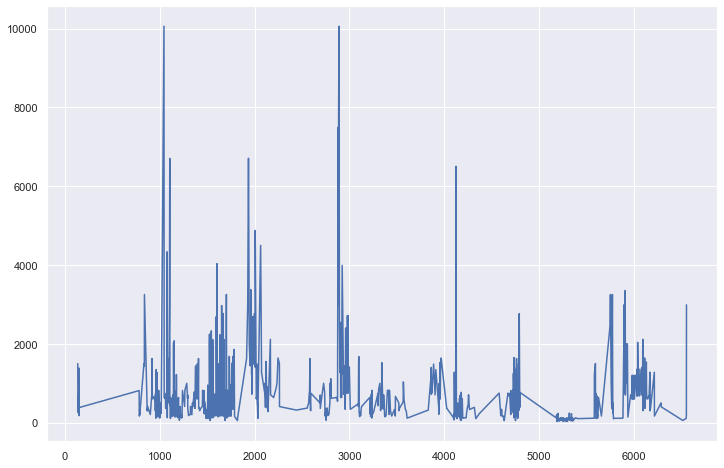

In [38]:
sns.set() 
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible

plt.plot(ventas['Facturacion_neta']) 
plt.show();

In [39]:
# Cantidad de compras por Canales

#sns.set()
#plt.figure(figsize=(12,6))
#sns.countplot(x = 'Canales',
#              data = ventas,
#              order = ventas['Canales'].value_counts().index)
#plt.show()

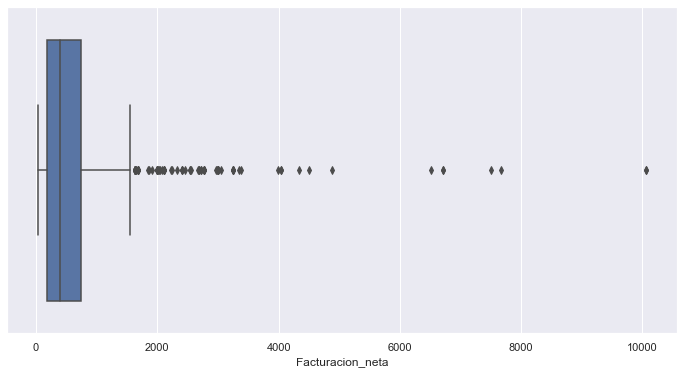

In [40]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Facturacion_neta', data=ventas);

**Análisis descriptivo multivariado**

In [41]:
pd.crosstab(ventas['Producto'], ventas['Cant_facturada'],margins=True)

Cant_facturada                           1.0  2.0  3.0  4.0  5.0  6.0  7.0  \
Producto                                                                     
PACK SEBASTIAN HYDRE                       1    0    0    0    1    0    4   
PACK SEBASTIAN PENETRAITT                  1    0    0    0    1    0    0   
PROFESSIONAL SEB SHINE SHAKER 75ML         0    1    0    3    0    0    0   
SEB CELLOPHANES CARAMEL BROWN 300 ML       2    1    1    2    0    1    0   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML     1    0    1    0    0    0    0   
SEB CELLOPHANES CRANBERRY RED 300 ML       2    0    1    0    0    2    0   
SEB CELLOPHANES ESPRESSO BROWN 300 ML      2    0    1    2    1    0    0   
SEB CELLOPHANES HONEY COMB BLOND 300ML     2    1    1    0    2    0    0   
SEB CELLOPHANES ICE BLOND 300 ML           1    2    0    0    2    0    1   
SEB CELLOPHANES SAFFRON RED 300 ML         0    0    0    1    0    1    0   
SEB CELLOPHANES SHINE CLEAR 300 ML         0    2    0    0    3    0    0   
SEB CELLOPHANES VANILLA BLOND 300 ML       1    1    0    0    0    0    0   
SEB COL IGNITE MONO SHP 1000ML             0    0    0    0    0    1    0   
SEB COL IGNITE MONO SHP 250ML              0    0    1    1    0    1    0   
SEB CRAFT CLAY REMOLD 50G                  1    0    0    2    0    0    0   
SEB DARK OIL 95ML                          4    1    1    5    0    0    0   
SEB DARK OIL CONDITIONER 1000ML IV         3    1    0    1    1    0    0   
SEB DARK OIL CONDITIONER 250ML             1    0    0    0    0    0    0   
SEB DARK OIL MASK 150ML                    1    0    0    0    0    7    0   
SEB DARK OIL MASK 500ML                    0    0    0    1    1    0    0   
SEB DARK OIL SHAMPOO 1000ML                1    0    0    2    1    1    0   
SEB DARK OIL SHAMPOO 250ML                 0    1    0    1    1    0    0   
SEB GEL FORTE STRONG 200ML                 2    0    0    6    0    0    0   
SEB HYDRE CONDITIONER 1000ML               2    1    2    3    1    1    0   
SEB HYDRE CONDITIONER 250ML                0    0    1    3    0    0    0   
SEB HYDRE SHAMPOO 1000ML                   2    2    2    1    1    1    1   
SEB HYDRE SHAMPOO 250ML                    5    0    2    3    1    0    0   
SEB HYDRE TREATMENT 150ML                  1    0    0    5    0    0    1   
SEB LIQUID STEEL STYLER GEL 150ML          0    0    0    3    0    0    1   
SEB MATTE PUTTY SOFT 75G                   1    0    0    2    0    0    0   
SEB MICROWEB FIB ELAST 45ML                0    0    0    0    0    3    0   
SEB PENETRAITT CONDIT. 1000ML              9    1    1    6    2    1    2   
SEB PENETRAITT CONDITION 250ML             0    1    4    3    0    1    2   
SEB PENETRAITT MASQUE 150ml                5    0    0    5    0    1    1   
SEB PENETRAITT PRO MASQUE 500ML            6    4    0    3    0    0    1   
SEB PENETRAITT SHAMPOO 1000ML             17    0    2    5    2    4    0   
SEB PENETRAITT SHAMPOO 250ML               1    1    3    4    1    4    2   
SEB POTION 9 LITE STYLER 150ml             1    0    0    2    0    0    0   
SEB POTION 9 STYL TRT 150ML                2    0    0   10    1    1    5   
SEB POTION 9 STYL TRT 500ML                5    2    0   10    1    0    2   
SEB RE-SHAPER 400ML                        1    1    3    3    0    0    1   
SEB SHAPER FIERCE 400ML                    0    0    1    2    0    0    0   
SEB SHAPER ZERO GRAV. 400ML                0    2    1    3    0    0    0   
SEB SHINE CRAFTER WAX 50ML                 0    0    0    2    0    0    0   
SEB SHINE DEFINE SPRAY 200ML               0    0    0    4    0    0    0   
SEB SUBLIMATE STYLING CREME 100ML          0    0    0    2    0    0    0   
SEB TAMING ELIXIR SERUM 140ML              0    1    0    5    0    0    0   
SEB TEXTURIZER BODYFYING 150ML             1    0    0    4    0    1    0   
SEB THICKEFY FOAM 190ML                    0    1    0    0    0    0    0   
SEB TRILLIANCE CND 100

In [42]:
pd.crosstab(ventas['Producto'], ventas['Cant_facturada'],margins=True).apply(lambda r: r/len(ventas) *100,
                                                                                        axis=1)

Cant_facturada                                 1.0       2.0       3.0  \
Producto                                                                 
PACK SEBASTIAN HYDRE                      0.102145  0.000000  0.000000   
PACK SEBASTIAN PENETRAITT                 0.102145  0.000000  0.000000   
PROFESSIONAL SEB SHINE SHAKER 75ML        0.000000  0.102145  0.000000   
SEB CELLOPHANES CARAMEL BROWN 300 ML      0.204290  0.102145  0.102145   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML    0.102145  0.000000  0.102145   
SEB CELLOPHANES CRANBERRY RED 300 ML      0.204290  0.000000  0.102145   
SEB CELLOPHANES ESPRESSO BROWN 300 ML     0.204290  0.000000  0.102145   
SEB CELLOPHANES HONEY COMB BLOND 300ML    0.204290  0.102145  0.102145   
SEB CELLOPHANES ICE BLOND 300 ML          0.102145  0.204290  0.000000   
SEB CELLOPHANES SAFFRON RED 300 ML        0.000000  0.000000  0.000000   
SEB CELLOPHANES SHINE CLEAR 300 ML        0.000000  0.204290  0.000000   
SEB CELLOPHANES VANILLA BLOND 300 ML      0.102145  0.102145  0.000000   
SEB COL IGNITE MONO SHP 1000ML            0.000000  0.000000  0.000000   
SEB COL IGNITE MONO SHP 250ML             0.000000  0.000000  0.102145   
SEB CRAFT CLAY REMOLD 50G                 0.102145  0.000000  0.000000   
SEB DARK OIL 95ML                         0.408580  0.102145  0.102145   
SEB DARK OIL CONDITIONER 1000ML IV        0.306435  0.102145  0.000000   
SEB DARK OIL CONDITIONER 250ML            0.102145  0.000000  0.000000   
SEB DARK OIL MASK 150ML                   0.102145  0.000000  0.000000   
SEB DARK OIL MASK 500ML                   0.000000  0.000000  0.000000   
SEB DARK OIL SHAMPOO 1000ML               0.102145  0.000000  0.000000   
SEB DARK OIL SHAMPOO 250ML                0.000000  0.102145  0.000000   
SEB GEL FORTE STRONG 200ML                0.204290  0.000000  0.000000   
SEB HYDRE CONDITIONER 1000ML              0.204290  0.102145  0.204290   
SEB HYDRE CONDITIONER 250ML               0.000000  0.000000  0.102145   
SEB HYDRE SHAMPOO 1000ML                  0.204290  0.204290  0.204290   
SEB HYDRE SHAMPOO 250ML                   0.510725  0.000000  0.204290   
SEB HYDRE TREATMENT 150ML                 0.102145  0.000000  0.000000   
SEB LIQUID STEEL STYLER GEL 150ML         0.000000  0.000000  0.000000   
SEB MATTE PUTTY SOFT 75G                  0.102145  0.000000  0.000000   
SEB MICROWEB FIB ELAST 45ML               0.000000  0.000000  0.000000   
SEB PENETRAITT CONDIT. 1000ML             0.919305  0.102145  0.102145   
SEB PENETRAITT CONDITION 250ML            0.000000  0.102145  0.408580   
SEB PENETRAITT MASQUE 150ml               0.510725  0.000000  0.000000   
SEB PENETRAITT PRO MASQUE 500ML           0.612870  0.408580  0.000000   
SEB PENETRAITT SHAMPOO 1000ML             1.736466  0.000000  0.204290   
SEB PENETRAITT SHAMPOO 250ML              0.102145  0.102145  0.306435   
SEB POTION 9 LITE STYLER 150ml            0.102145  0.000000  0.000000   
SEB POTION 9 STYL TRT 150ML               0.204290  0.000000  0.000000   
SEB POTION 9 STYL TRT 500ML               0.510725  0.204290  0.000000   
SEB RE-SHAPER 400ML                       0.102145  0.102145  0.306435   
SEB SHAPER FIERCE 400ML                   0.000000  0.000000  0.102145   
SEB SHAPER ZERO GRAV. 400ML               0.000000  0.204290  0.102145   
SEB SHINE CRAFTER WAX 50ML                0.000000  0.000000  0.000000   
SEB SHINE DEFINE SPRAY 200ML              0.000000  0.000000  0.000000   
SEB SUBLIMATE STYLING CREME 100ML         0.000000  0.000000  0.000000   
SEB TAMING ELIXIR SERUM 140ML             0.000000  0.102145  0.000000   
SEB TEXTURIZER BODYFYING 150ML            0.102145  0.000000  0.000000   
SEB THICKEFY FOAM 190ML                   0.000000  0.102145  0.000000   
SEB TRILLIANCE CND 1000ML                 0.817160  0.000000  0.102145   
SEB TRILLIANCE CND 250ML                  0.000000  0.000000  0.000000   
SEB TRILLIANCE SHP 1000ML                 0.612870  0.102145  0.102145   
SEB 

In [43]:
# Grouped boxplot, cantidad facturada promedio por Canal

# plot chart
#plt.pie(ventas['Facturacion_neta'], labels=ventas['Canales']  autopct='%0.f%%', shadow=True, startangle=90)

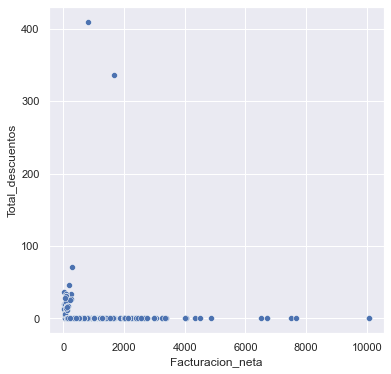

In [44]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Facturacion_neta', y=ventas['Total_descuentos'], data=ventas )
plt.show()

<Figure size 864x576 with 0 Axes>

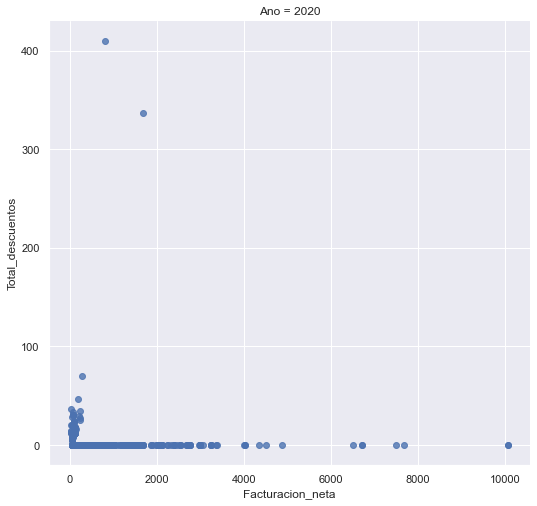

In [45]:
plt.figure(figsize=(12,8))
sns.lmplot(x='Facturacion_neta', y='Total_descuentos', data=ventas,
           fit_reg=False,
           col= 'Ano',
           col_wrap=4,
           size=7
          )   
plt.show()

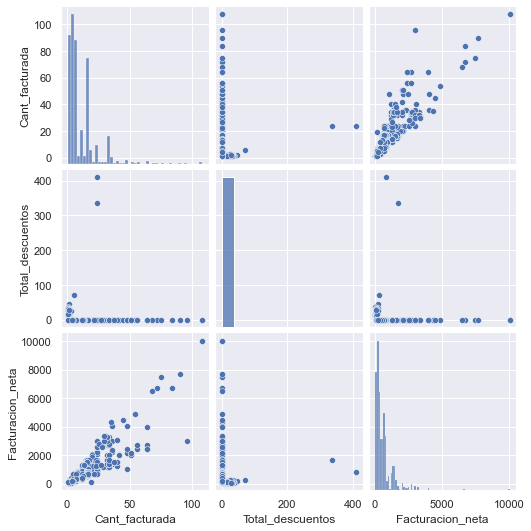

In [46]:
sns.pairplot(ventas[var_1]);

In [47]:
tendencia = ventas.groupby('Ano_Mes').sum()['Facturacion_neta'].reset_index()
tendencia.head(5)

Ano_Mes  Facturacion_neta
0   202001          67428.11
1   202002          71394.75
2   202003           8970.39
3   202004           7831.15
4   202005          24496.66

In [48]:
from datetime import datetime
tendencia['Ano_Mes']=tendencia['Ano_Mes'].replace("[,""]","", regex=True)
tendencia['Ano_Mes']= tendencia['Ano_Mes'].astype(str)


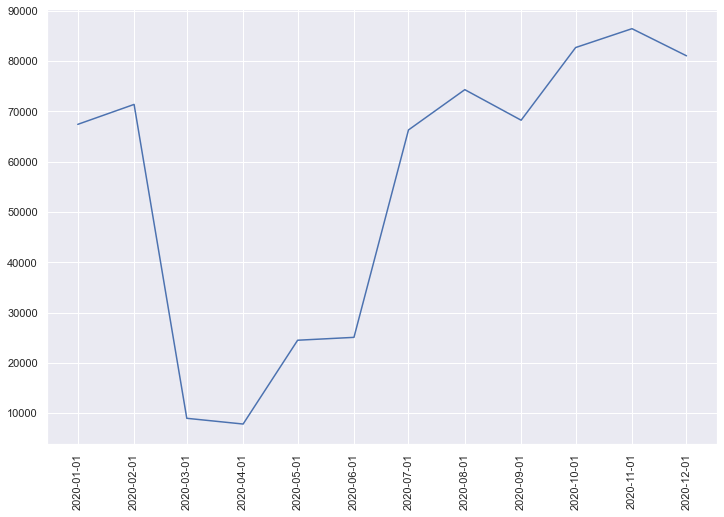

In [49]:
tendencia['Ano_Mes'] = pd.to_datetime(tendencia['Ano_Mes'], format='%Y%m')

am =tendencia['Ano_Mes'].unique()
plt.figure(figsize=(12,8))
plt.plot(am, tendencia['Facturacion_neta'])
plt.xticks(am, rotation=90)

plt.show()

Text(0, 0.5, 'Facturacion_neta')

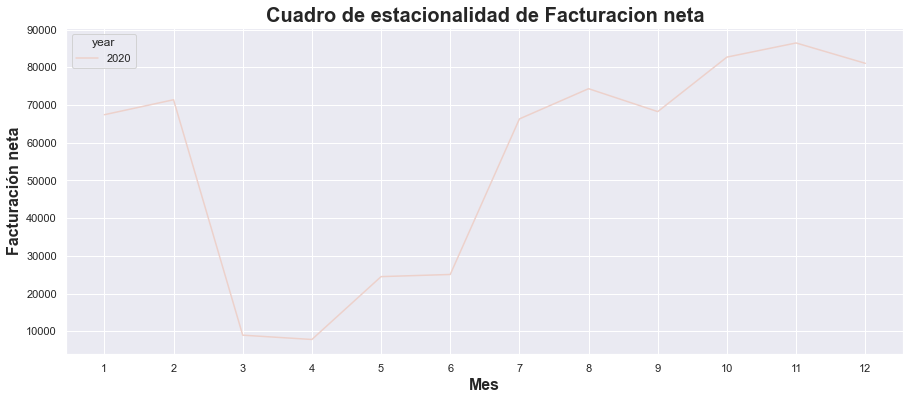

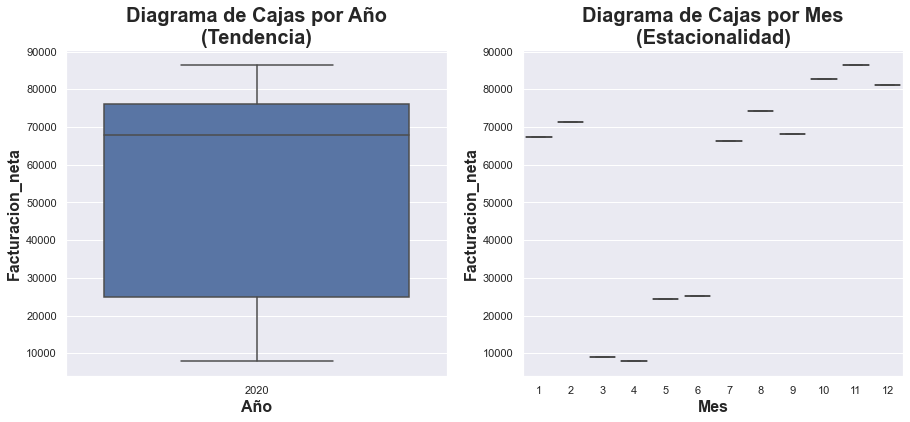

In [50]:
tendencia['year'] = tendencia['Ano_Mes'].dt.year
tendencia['month'] = tendencia['Ano_Mes'].dt.month

d = tendencia

variable = 'Facturacion_neta'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Cuadro de estacionalidad de Facturacion neta', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Facturación neta', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_xticks(range(1,13))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Diagrama de Cajas por Año\n(Tendencia)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Año', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Diagrama de Cajas por Mes\n(Estacionalidad)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

Text(0, 0.5, 'Facturacion_neta')

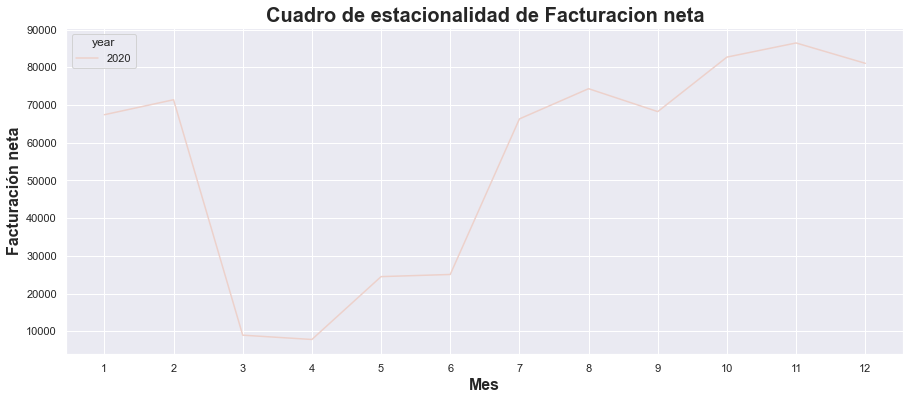

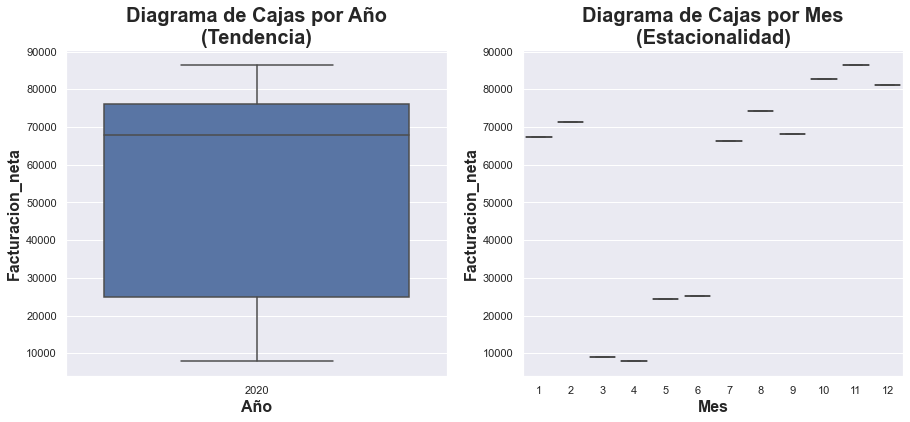

In [51]:
tendencia['year'] = tendencia['Ano_Mes'].dt.year
tendencia['month'] = tendencia['Ano_Mes'].dt.month

d = tendencia

variable = 'Facturacion_neta'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Cuadro de estacionalidad de Facturacion neta', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Facturación neta', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_xticks(range(1,13))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Diagrama de Cajas por Año\n(Tendencia)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Año', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Diagrama de Cajas por Mes\n(Estacionalidad)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

In [52]:
tendencia = tendencia.set_index('Ano_Mes')

anual = tendencia.resample('Y').sum()
anual

Facturacion_neta   year  month
Ano_Mes                                   
2020-12-31         664307.73  24240     78

In [53]:
top=pd.DataFrame(ventas.groupby(['Ano','Producto']) [['Facturacion_neta']].sum()['Facturacion_neta'])
top=top.sort_values(by=['Ano', 'Facturacion_neta'], ascending=False)
top.head(15)



Facturacion_neta
Ano  Producto                                               
2020 SEB POTION 9 STYL TRT 500ML                    50822.78
     PACK SEBASTIAN HYDRE                           50787.33
     PACK SEBASTIAN PENETRAITT                      41934.00
     SEB DARK OIL 95ML                              40099.14
     SEB POTION 9 STYL TRT 150ML                    34447.02
     SEB PENETRAITT SHAMPOO 1000ML                  30623.90
     SEB PENETRAITT PRO MASQUE 500ML                29875.07
     SEB PENETRAITT CONDIT. 1000ML                  27131.93
     SEB PENETRAITT MASQUE 150ml                    26277.27
     SEB HYDRE SHAMPOO 250ML                        19177.30
     SEB PENETRAITT CONDITION 250ML                 18844.47
     SEB PENETRAITT SHAMPOO 250ML                   16800.00
     SEB DARK OIL SHAMPOO 250ML                     14644.80
     SEB DARK OIL CONDITIONER 250ML                 13655.84
     SEB TWISTED MAGNIFIER STY CREAM 145ML          11838.27

In [54]:
top1=top.sort_values(by=['Facturacion_neta'], ascending=False)
top2=pd.DataFrame(top1.groupby(['Producto']) [['Facturacion_neta']].sum()['Facturacion_neta'])
top2=top2.sort_values(by=['Facturacion_neta'], ascending=False)
top2['Producto'] = top2.index
sorter=top2.index.tolist()
top3=pd.DataFrame(top1.groupby(['Producto','Ano']) [['Facturacion_neta']].sum()['Facturacion_neta'])

top3 = top3.reset_index()
sorterIndex = dict(zip(sorter, range(len(sorter))))
top3['Prod_rank'] = top3['Producto'].map(sorterIndex)
top3.sort_values('Prod_rank',
        ascending = True, inplace = True)
top3=top3.reset_index()
top3=top3.drop(columns=['index'])
top3


Producto   Ano  Facturacion_neta  Prod_rank
0               SEB POTION 9 STYL TRT 500ML  2020          50822.78          0
1                      PACK SEBASTIAN HYDRE  2020          50787.33          1
2                 PACK SEBASTIAN PENETRAITT  2020          41934.00          2
3                         SEB DARK OIL 95ML  2020          40099.14          3
4               SEB POTION 9 STYL TRT 150ML  2020          34447.02          4
5             SEB PENETRAITT SHAMPOO 1000ML  2020          30623.90          5
6           SEB PENETRAITT PRO MASQUE 500ML  2020          29875.07          6
7             SEB PENETRAITT CONDIT. 1000ML  2020          27131.93          7
8               SEB PENETRAITT MASQUE 150ml  2020          26277.27          8
9                   SEB HYDRE SHAMPOO 250ML  2020          19177.30          9
10           SEB PENETRAITT CONDITION 250ML  2020          18844.47         10
11             SEB PENETRAITT SHAMPOO 250ML  2020          16800.00         11
12               SEB DARK OIL SHAMPOO 250ML  2020          14644.80         12
13           SEB DARK OIL CONDITIONER 250ML  2020          13655.84         13
14    SEB TWISTED MAGNIFIER STY CREAM 145ML  2020          11838.27         14
15                     SEB TRILLIANT 150 ML  2020          11527.20         15
16                  SEB DARK OIL MASK 150ML  2020          10514.00         16
17             SEB HYDRE CONDITIONER 1000ML  2020          10266.31         17
18                 SEB TRILLIANCE SHP 250ML  2020           9943.56         18
19                  SEB DARK OIL MASK 500ML  2020           9908.34         19
20              SEB HYDRE CONDITIONER 250ML  2020           9846.66         20
21      SEB TWISTED ELASTIC TREATMENT 500ML  2020           9654.28         21
22                 SEB HYDRE SHAMPOO 1000ML  2020           9051.62         22
23          SEB TWISTED CLEANSER SHAMPOO 1L  2020           8531.16         23
24                SEB TRILLIANCE SHP 1000ML  2020           8449.55         24
25          SEB TWISTED DETANGLER CONDIT 1L  2020           8013.63         25
26       SEB CELLOPHANES SHINE CLEAR 300 ML  2020           7098.65         26
27                SEB TRILLIANCE CND 1000ML  2020           6856.26         27
28                  SEB WHIPPED CREME 150ML  2020           6168.75         28
29                      SEB RE-SHAPER 400ML  2020           5967.80         29
30                  SEB SHAPER FIERCE 400ML  2020           5743.68         30
31      SEB TWISTED ELASTIC TREATMENT 150ML  2020           5527.36         31
32         SEB CELLOPHANES ICE BLOND 300 ML  2020           4979.65         32
33              SEB SHAPER ZERO GRAV. 400ML  2020           4906.06         33
34   SEB CELLOPHANES HONEY COMB BLOND 300ML  2020           4767.75         34
35                 SEB TRILLIANCE CND 250ML  2020           4753.56         35
36                  SEBMAN PLAYER GEL 150ML  2020           4223.58         36
37       SEB TWISTED CLEANSER SHAMPOO 250ML  2020           4215.46         37
38       SEB TWISTED DETANGLER CONDIT 250ML  2020           4198.24         38
39      SEBMAN MULTITASKER SHAMP 3EN1 250ML  2020           3700.90         39
40            SEB TAMING ELIXIR SERUM 140ML  2020           3466.25         40
41              SEB DARK OIL SHAMPOO 1000ML  2020           3189.91         41
42    SEB CELLOPHANES ESPRESSO BROWN 300 ML  2020           3178.50         42
43               SEB GEL FORTE STRONG 200ML  2020           2800.92         43
44     SEB CELLOPHANES CARAMEL BROWN 300 ML  2020           2648.75         44
45            SEB COL IGNITE MONO SHP 250ML  2020           2495.16         45
46              SEBMAN ACONDICIONADOR 250ML  2020           2408.74         46
47      SEB DARK OIL CONDITIONER 1000ML IV   2020           2354.33         47
48             SEB SHINE DEFINE SPRAY 200ML  2020           2331.42         48
49                SEB HYDRE TREATMENT 150ML  2020           2309.25         49
50    

In [55]:
categoria_tipo=pd.DataFrame(ventas.groupby(['Ano','CATEGORIA','TIPO']).sum()['Facturacion_neta'])
categoria_tipo.sort_values(['Ano', 'CATEGORIA'], ascending=False)


Facturacion_neta
Ano  CATEGORIA  TIPO                            
2020 STYLING    GEL                      5120.69
                PASTA                    1071.20
                POMADA                    803.40
                SPRAY                     706.61
     GROOMING   ACEITE                   1362.23
                BALSAMO                  1064.50
     FOUNDATION ACONDICIONADOR          93709.36
                PACK                    92721.33
                SHAMPOO                115240.70
                TRATAM                  78883.93
     FORM       AEROSOL                 16617.54
                CERA                     2347.47
                CREMA                    1498.77
                GEL                      6293.95
     FLOW       MOUSSE                   7723.03
                SUERO                    3466.25
                TRATAM                  87380.28
     FLEX       ACONDICIONADOR          12211.87
                CREMA                   11838.27
                MOUSSE                   1713.76
                SHAMPOO                 12746.62
                TRATAM                  15181.64
     FLAUNT     AEROSOL                   741.51
                CERA                      332.40
                CREMA                    1940.70
                SPRAY                   13858.62
     DARK OIL   ACEITE                  40099.14
     COLOR      COLOR                   27229.15
     CARE       ACONDICIONADOR           2856.15
                SHAMPOO                  5673.66
                TONICO                   1873.00

In [56]:
mesaño=ventas
mesaño['Ano_Mes']= mesaño['Ano_Mes'].astype(str)
mesaño['id_compra']=mesaño['Solicitante']
mesaño['id_compra']=mesaño['Solicitante']+mesaño['Ano_Mes']


mesaño['Grouped'] = mesaño.groupby('id_compra')['Producto'].transform(lambda x: ','.join(x) )
mesaño=mesaño[['id_compra','Grouped']].drop_duplicates()
mesaño.head(50)


id_compra  \
135   KALIA SALON SOCIEDAD ANONIMA CERRAD202010   
136   KALIA SALON SOCIEDAD ANONIMA CERRAD202012   
782       SALCEDO BRINGAS RICARDO ENRIQUE202001   
783   MORON LOPEZ DE VILLIGER MARIA ELIZA202002   
785   MORON LOPEZ DE VILLIGER MARIA ELIZA202010   
833             CENTRO DE ESTETICA ARAMIS202002   
867   FIGUEROA VILLAR DE BALDERA NERI ROS202009   
899                 CONSTRUCTA I B S.A.C.202002   
900                 CONSTRUCTA I B S.A.C.202003   
917       INVERSIONES TOVAR QUISPE S.A.C.202006   
918       INVERSIONES TOVAR QUISPE S.A.C.202007   
921       INVERSIONES TOVAR QUISPE S.A.C.202010   
951                   HINOJOSA PEREZ GABY202007   
952                   HINOJOSA PEREZ GABY202010   
954                   HINOJOSA PEREZ GABY202008   
961       DE LA CRUZ SOTOMAYOR SAN WILSON202005   
969                          MAYEX S.A.C.202011   
1005         NVY BY NATALIE VERTIZ S.A.C.202009   
1006         NVY BY NATALIE VERTIZ S.A.C.202010   
1007         NVY BY NATALIE VERTIZ S.A.C.202012   
1010             VENUS SALON & SPA S.A.C.202006   
1044         E.M.D. SAINTS MASTERS S.A.C.202007   
1056         E.M.D. SAINTS MASTERS S.A.C.202009   
1057         E.M.D. SAINTS MASTERS S.A.C.202010   
1058         E.M.D. SAINTS MASTERS S.A.C.202012   
1074         E.M.D. SAINTS MASTERS S.A.C.202008   
1081         E.M.D. SAINTS MASTERS S.A.C.202011   
1102                 EMPHASE GROUP S.A.C.202007   
1106                 EMPHASE GROUP S.A.C.202002   
1107                 EMPHASE GROUP S.A.C.202006   
1112                 EMPHASE GROUP S.A.C.202012   
1123                 EMPHASE GROUP S.A.C.202009   
1126                 EMPHASE GROUP S.A.C.202011   
1144                 EMPHASE GROUP S.A.C.202005   
1145                 EMPHASE GROUP S.A.C.202008   
1197                          MKER S.A.C.202012   
1226                         MALUC S.A.C.202012   
1239        MATIAS MARQUEZ VICTOR AUGUSTO202010   
1262  GOZZING & VERA SOCIEDAD ANONIMA CER202009   
1284        LABORIANO VIDARTE JOSE ULISES202010   
1308        LABORIANO VIDARTE JOSE ULISES202012   
1364              GONZALES SALON SPA EIRL202009   
1449                       RG PERU S.A.C.202003   
1451                       RG PERU S.A.C.202012   
1462         SAJ PARAISO COSMETICO S.A.C.202008   
1471              STANIC PETROVIC NEVENKA202003   
1485      REPRESENTACIONES PROBELA S.A.C.202009   
1487      REPRESENTACIONES PROBELA S.A.C.202011   
1522      REPRESENTACIONES PROBELA S.A.C.202010   
1530      REPRESENTACIONES PROBELA S.A.C.202002   

                                                Grouped  
135   SEB DARK OIL 95ML,SEB TWISTED CLEANSER SHAMPOO...  
136   SEB DARK OIL 95ML,SEB DARK OIL SHAMPOO 250ML,S...  
782                         SEB POTION 9 STYL TRT 500ML  
783   SEB SUBLIMATE STYLING CREME 100ML,SEB TWISTED ...  
785         SEB SHAPER FIERCE 400ML,SEB RE-SHAPER 400ML  
833   PACK SEBASTIAN HYDRE,SEB SHAPER FIERCE 400ML,S...  
867   SEB DARK OIL SHAMPOO 250ML,SEB DARK OIL CONDIT...  
899                         SEB POTION 9 STYL TRT 150ML  
900                         SEB POTION 9 STYL TRT 150ML  
917   SEB TWISTED MAGNIFIER STY CREAM 145ML,SEB TRIL...  
918                         SEB POTION 9 STYL TRT 500ML  
921   SEB TRILLIANCE SHP 250ML,SEB TRILLIANCE CND 250ML  
951   SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
952   SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT C...  
954                       SEB PENETRAITT CONDIT. 1000ML  
961   SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
969   PACK SEBASTIAN HYDRE,SEB DARK OIL 95ML,SEB TWI...  
1005                        SEB POTION 9 STYL TRT 150ML  
1006                        SEB POTION 9 STYL TRT 150ML  
1007                        SEB POTION 9 STYL TRT 150ML  
1010  SEB DARK OIL 95ML,SEB PENETRAITT PRO MASQUE 50...  
1044  PACK SEBASTIAN PENETRAITT,SEB CELLOPHANES CRAN...  
1056  SEB DARK OIL SHAMPOO 250ML,SEB DARK OIL CONDIT...  
1057  SEB DARK OIL SHAMPOO 250ML,SEB DARK OI

In [57]:
from itertools import combinations
from collections import Counter

count =Counter()

for row in mesaño['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

    

[(('SEB PENETRAITT SHAMPOO 250ML', 'SEB PENETRAITT CONDITION 250ML'), 25),
 (('SEB PENETRAITT SHAMPOO 1000ML', 'SEB PENETRAITT CONDIT. 1000ML'), 22),
 (('SEB DARK OIL SHAMPOO 250ML', 'SEB DARK OIL MASK 150ML'), 19),
 (('SEB PENETRAITT SHAMPOO 250ML', 'SEB POTION 9 STYL TRT 150ML'), 18),
 (('SEB DARK OIL SHAMPOO 250ML', 'SEB DARK OIL CONDITIONER 250ML'), 17),
 (('SEB PENETRAITT CONDITION 250ML', 'SEB POTION 9 STYL TRT 150ML'), 17),
 (('SEB DARK OIL 95ML', 'SEB POTION 9 STYL TRT 150ML'), 17),
 (('SEB PENETRAITT MASQUE 150ml', 'SEB POTION 9 STYL TRT 150ML'), 16),
 (('SEB HYDRE SHAMPOO 250ML', 'SEB POTION 9 STYL TRT 150ML'), 15),
 (('SEB DARK OIL 95ML', 'SEB PENETRAITT MASQUE 150ml'), 14)]

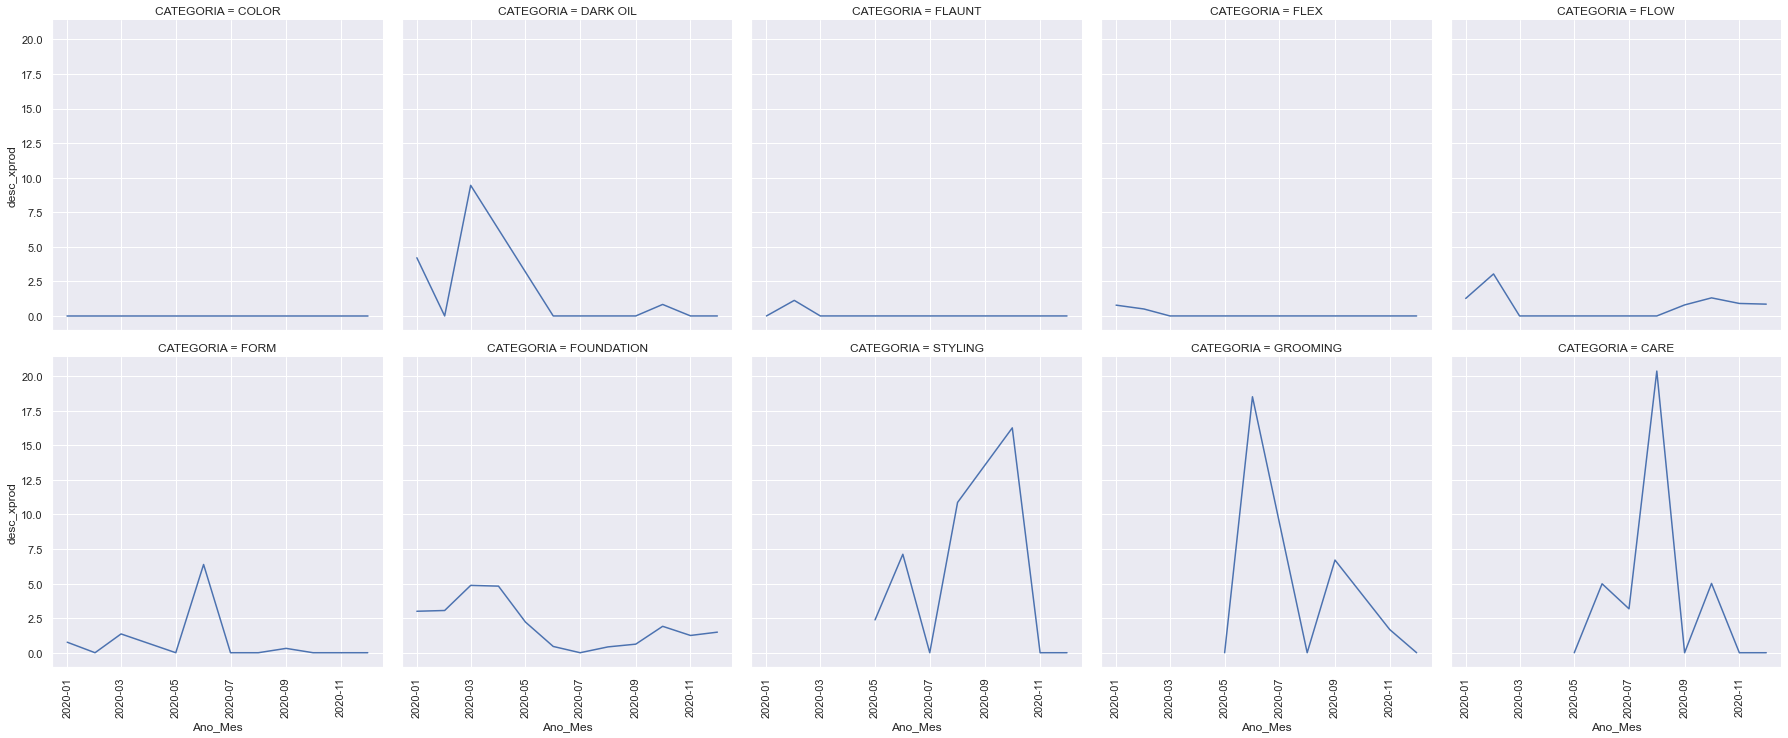

In [58]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','CATEGORIA']) [['desc_xprod','precio_venta_cd','precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','desc_xprod', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()


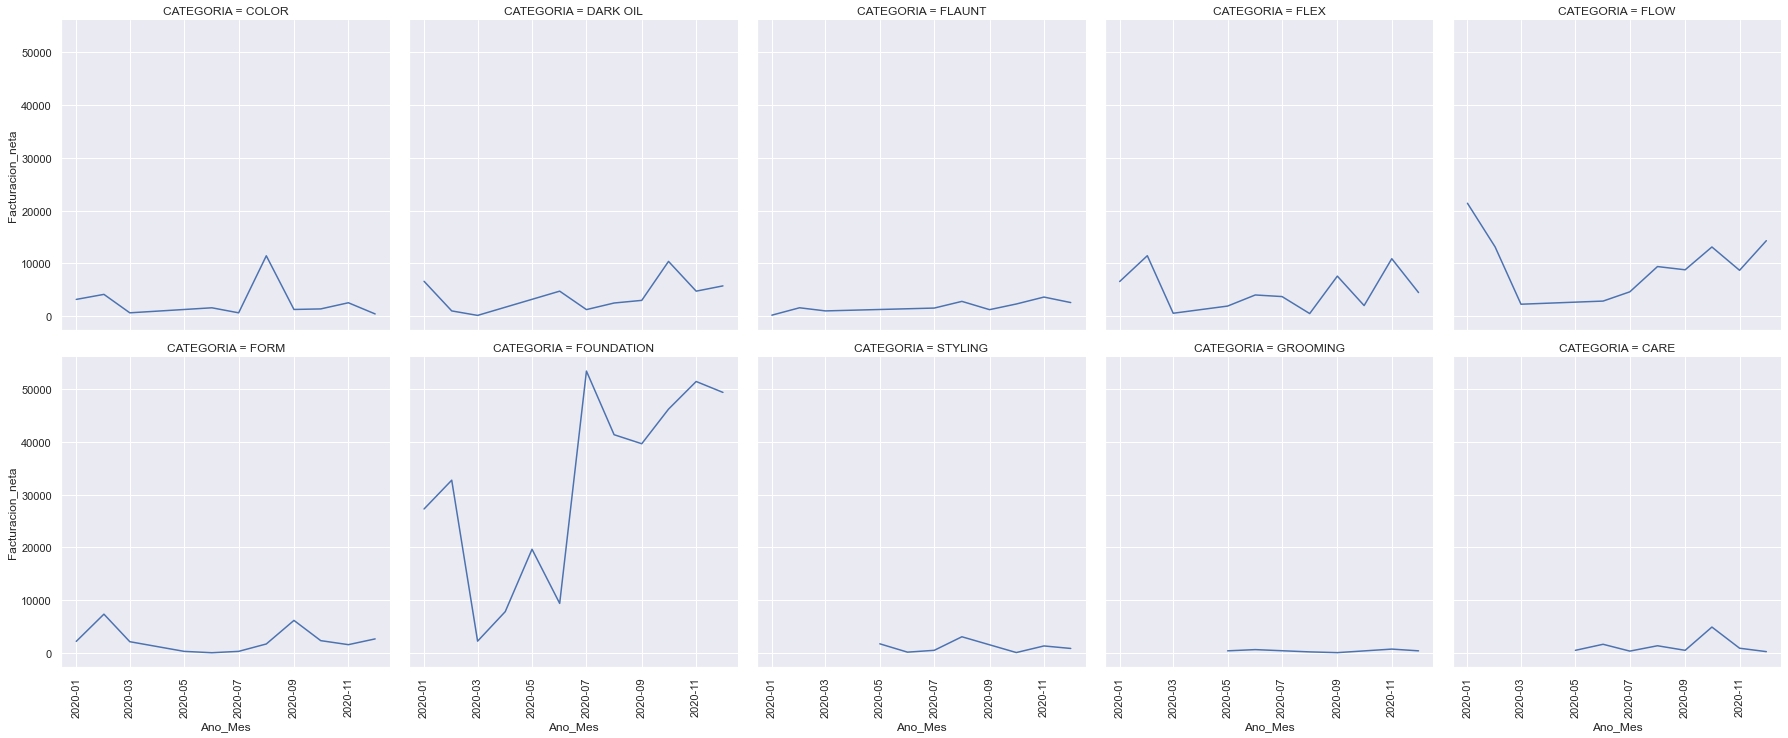

In [59]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','CATEGORIA']) [['Facturacion_neta']].sum())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','Facturacion_neta', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

In [60]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes']) [['Facturacion_neta']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()





In [61]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes']) [['precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()


<AxesSubplot:xlabel='TIPO', ylabel='TIPO'>

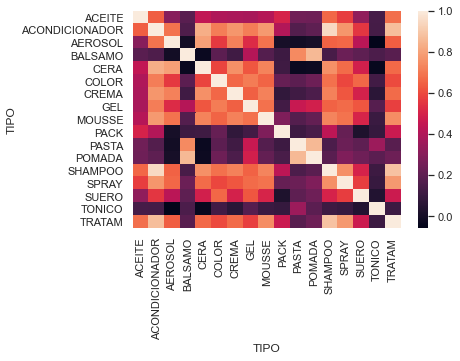

In [62]:
hm = pd.crosstab(ventas['Solicitante'], ventas['TIPO'])
hm2=hm.corr()
sns.heatmap(hm2)


array([<AxesSubplot:ylabel='Facturacion_neta'>], dtype=object)

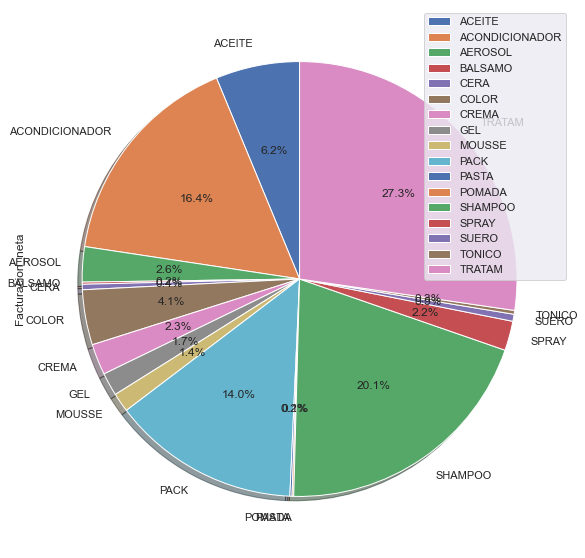

In [63]:
tipopie=pd.DataFrame(ventas.groupby(['TIPO']) [['Facturacion_neta']].sum())
tipopie.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10),autopct='%1.1f%%')

Facturacion_neta
count         10.000000
mean       66430.773000
std       178725.499936
min           54.570000
25%          533.957500
50%         1455.830000
75%        14162.572500
max       571662.200000

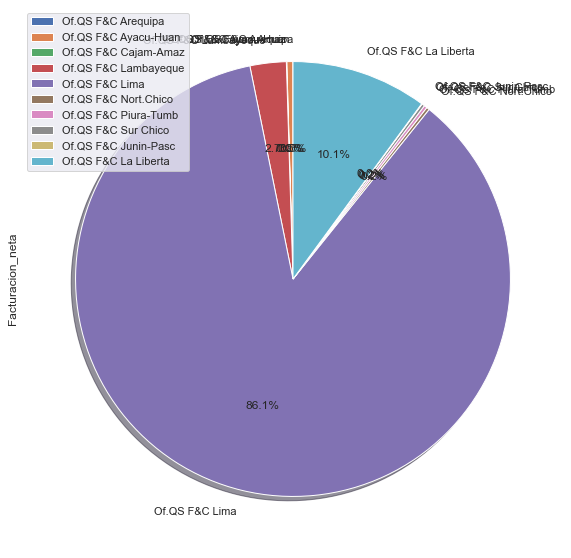

In [64]:

ubi=pd.DataFrame(ventas.groupby(['Oficina_ventas']) [['Facturacion_neta']].sum())
ubi.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
ubi.describe()

In [65]:



fact=pd.DataFrame(ventas.groupby(['Ano_Mes']) [['Facturacion_neta']].sum())
fact=fact.reset_index()

fact['Ano_Mes']=fact['Ano_Mes'].replace("[,""]","", regex=True)
fact['Ano_Mes']= fact['Ano_Mes'].astype(str)
fact['Ano_Mes'] = pd.to_datetime(fact['Ano_Mes'], format='%Y%m')

fact=fact.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
fact =fact['Ano_Mes'].unique()






array([<AxesSubplot:title={'center':'None'}, xlabel='None,Ano'>],
      dtype=object)

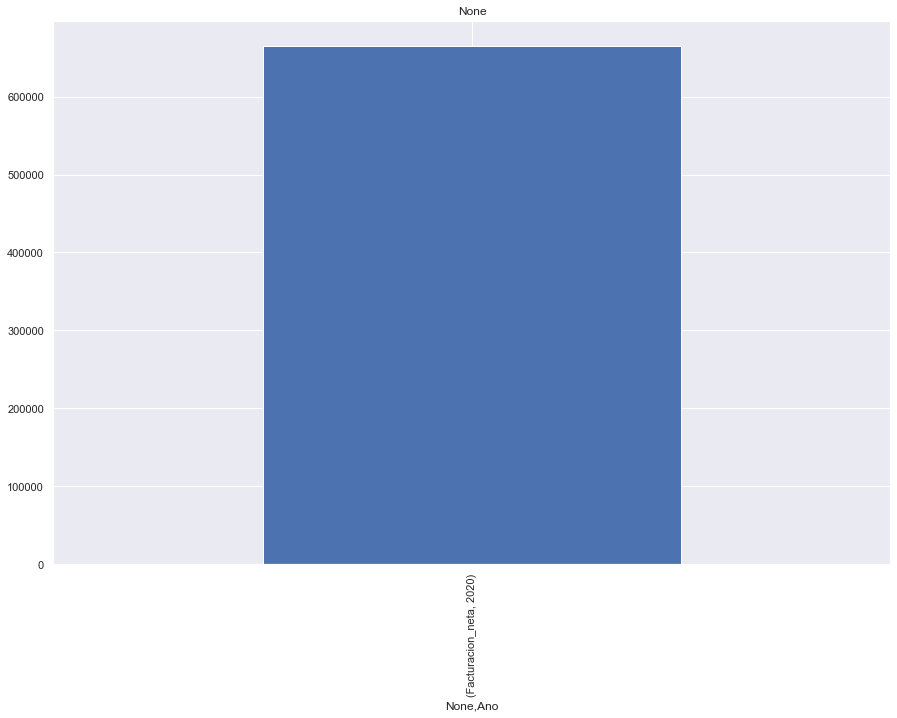

In [66]:
holi=pd.DataFrame(ventas.groupby(['Ano']) [['Facturacion_neta']].sum())

holi.unstack(0).plot(kind='bar',subplots=True,
figsize=(15,10))


#ventas.groupby('Ano').Canales.value_counts().unstack(0).plot.barh()


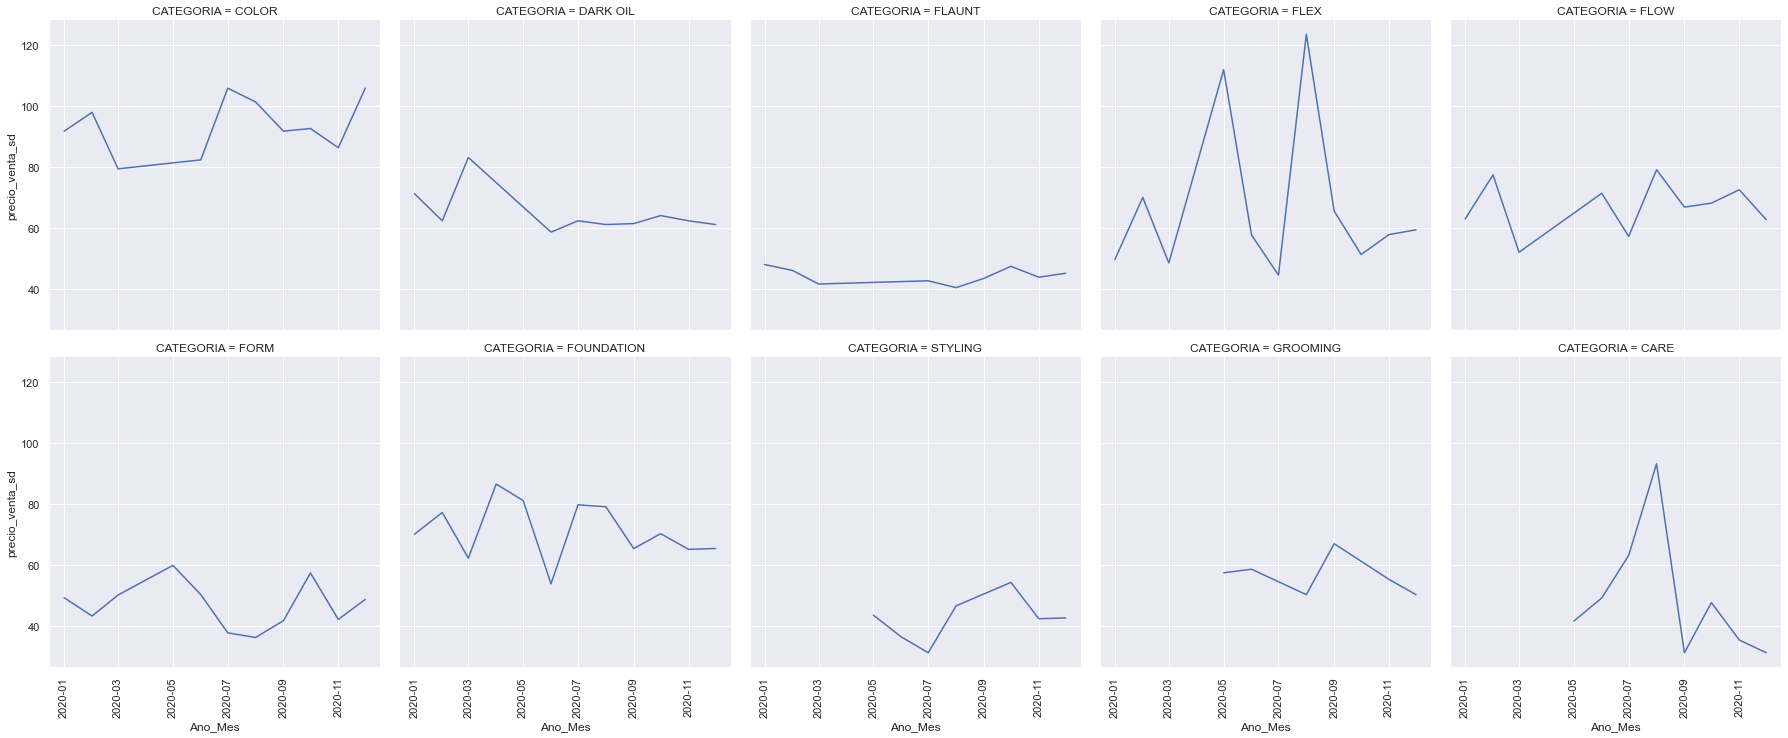

In [67]:

ventas['desc_xprod'] = (ventas['precio_venta_sd']-ventas['precio_venta_cd'])

descuentos=pd.DataFrame(ventas.groupby(['Ano_Mes','CATEGORIA']) [['desc_xprod','precio_venta_cd','precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()




k = sns.FacetGrid(descuentos, col='CATEGORIA',col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','precio_venta_sd', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()


# Feature Engineering

In [68]:

prodxsolicitante=pd.DataFrame(ventas.groupby(['id_venta','Solicitante', 'TIPO', 'Mes','Ano_Mes']) [['Facturacion_neta']].sum())

prodxsolicitante = prodxsolicitante.fillna(0).reset_index()




In [69]:
dfaceite = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "ACEITE" ].index)
dfaceite.rename(columns={'Facturacion_neta':'Facturacion_aceite'},inplace = True)
dfaceite = dfaceite.drop(['TIPO'], axis=1) 

dfaceite.head()
                                           

id_venta                          Solicitante Mes Ano_Mes  \
6   202001364042   PRODUCCIONES GUADALUPE Y ASOCIADOS  01  202001   
20  202001430525              DELUAM SALON SPA S.R.L.  01  202001   
40  202001436014      ZAFIRO CUIDADO Y GLAMOUR S.A.C.  01  202001   
43  202001441466    (I)ARIAS IBAÑEZ JESSICA GERALDINE  01  202001   
64   20200163634  (X)GALLEGOS SALAZAR ZOILA FELICITAS  01  202001   

    Facturacion_aceite  
6               249.57  
20              998.28  
40             3993.12  
43              998.28  
64               72.62

In [70]:
dfacondicionador = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "ACONDICIONADOR" ].index)
dfacondicionador.rename(columns={'Facturacion_neta':'Facturacion_acondicionador'},inplace = True)
dfacondicionador = dfacondicionador.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfacondicionador.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 628
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    100 non-null    object 
 1   Facturacion_acondicionador  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [71]:
dfaerosol = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "AEROSOL" ].index)
dfaerosol.rename(columns={'Facturacion_neta':'Facturacion_aerosol'},inplace = True)
dfaerosol = dfaerosol.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfaerosol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 5 to 610
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             22 non-null     object 
 1   Facturacion_aerosol  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


In [72]:
dfbalsamo = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "BALSAMO" ].index)
dfbalsamo.rename(columns={'Facturacion_neta':'Facturacion_balsamo'},inplace = True)
dfbalsamo = dfbalsamo.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfbalsamo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 215 to 620
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             4 non-null      object 
 1   Facturacion_balsamo  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [73]:
dfcera = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "CERA" ].index)
dfcera.rename(columns={'Facturacion_neta':'Facturacion_cera'},inplace = True)
dfcera = dfcera.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfcera.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 31 to 503
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_venta          6 non-null      object 
 1   Facturacion_cera  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


In [74]:
dfcolor = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "COLOR" ].index)
dfcolor.rename(columns={'Facturacion_neta':'Facturacion_color'},inplace = True)
dfcolor = dfcolor.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfcolor.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 32 to 606
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           19 non-null     object 
 1   Facturacion_color  19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 456.0+ bytes


In [75]:
dfcrema = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "CREMA" ].index)
dfcrema.rename(columns={'Facturacion_neta':'Facturacion_crema'},inplace = True)
dfcrema = dfcrema.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfcrema.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 8 to 611
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           24 non-null     object 
 1   Facturacion_crema  24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [76]:
dfgel = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "GEL" ].index)
dfgel.rename(columns={'Facturacion_neta':'Facturacion_gel'},inplace = True)
dfgel = dfgel.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfgel.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 12 to 621
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         26 non-null     object 
 1   Facturacion_gel  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [77]:
dfmousse = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "MOUSSE" ].index)
dfmousse.rename(columns={'Facturacion_neta':'Facturacion_mousse'},inplace = True)
dfmousse = dfmousse.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfmousse.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 3 to 612
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            23 non-null     object 
 1   Facturacion_mousse  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 552.0+ bytes


In [78]:
dfpack = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "PACK" ].index)
dfpack.rename(columns={'Facturacion_neta':'Facturacion_pack'},inplace = True)
dfpack = dfpack.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfpack.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 14 to 613
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_venta          29 non-null     object 
 1   Facturacion_pack  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 696.0+ bytes


In [79]:
dfpasta = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "PASTA" ].index)
dfpasta.rename(columns={'Facturacion_neta':'Facturacion_pasta'},inplace = True)
dfpasta = dfpasta.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfpasta.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 189 to 622
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           4 non-null      object 
 1   Facturacion_pasta  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [80]:
dfpomada = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "POMADA" ].index)
dfpomada.rename(columns={'Facturacion_neta':'Facturacion_pomada'},inplace = True)
dfpomada = dfpomada.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfpomada.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 190 to 623
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            3 non-null      object 
 1   Facturacion_pomada  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 72.0+ bytes


In [81]:
dfshampoo = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SHAMPOO" ].index)
dfshampoo.rename(columns={'Facturacion_neta':'Facturacion_shampoo'},inplace = True)
dfshampoo = dfshampoo.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfshampoo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 9 to 629
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             134 non-null    object 
 1   Facturacion_shampoo  134 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [82]:
dfspray = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SPRAY" ].index)
dfspray.rename(columns={'Facturacion_neta':'Facturacion_spray'},inplace = True)
dfspray = dfspray.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfspray.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 37 to 625
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           30 non-null     object 
 1   Facturacion_spray  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [83]:
dfsuero = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SUERO" ].index)
dfsuero.rename(columns={'Facturacion_neta':'Facturacion_suero'},inplace = True)
dfsuero = dfsuero.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfsuero.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 123 to 616
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           11 non-null     object 
 1   Facturacion_suero  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


In [84]:
dftonico = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "TONICO" ].index)
dftonico.rename(columns={'Facturacion_neta':'Facturacion_tonico'},inplace = True)
dftonico = dftonico.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dftonico.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 219 to 545
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            7 non-null      object 
 1   Facturacion_tonico  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


In [85]:
dftratam = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "TRATAM" ].index)
dftratam.rename(columns={'Facturacion_neta':'Facturacion_tratam'},inplace = True)
dftratam = dftratam.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dftratam.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 617
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            138 non-null    object 
 1   Facturacion_tratam  138 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [86]:
comport = pd.merge(left=dfaceite,right=dfacondicionador, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfaerosol, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfbalsamo, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcera, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcolor, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcrema, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfgel, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfmousse, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpack, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpasta, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpomada, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfshampoo, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfspray, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfsuero, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dftonico, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dftratam, how='left', left_on='id_venta', right_on='id_venta') 
comport["Facturacion_total"]= comport.iloc[:,6:24].sum(axis=1)
comport = comport.fillna(0)
comport.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    50 non-null     object 
 1   Solicitante                 50 non-null     object 
 2   Mes                         50 non-null     object 
 3   Ano_Mes                     50 non-null     object 
 4   Facturacion_aceite          50 non-null     float64
 5   Facturacion_acondicionador  50 non-null     float64
 6   Facturacion_aerosol         50 non-null     float64
 7   Facturacion_balsamo         50 non-null     float64
 8   Facturacion_cera            50 non-null     float64
 9   Facturacion_color           50 non-null     float64
 10  Facturacion_crema           50 non-null     float64
 11  Facturacion_gel             50 non-null     float64
 12  Facturacion_mousse          50 non-null     float64
 13  Facturacion_pack            50 non-nu

In [2]:
comport.loc[comport['Facturacion_total'] >= 4601.5125, 'top'] = '1'
comport.loc[comport['Facturacion_total'] < 4601.5125, 'top'] = '0'
comport['top'] = comport['top'].astype(int)
comport = comport.drop(['Solicitante'], axis=1) #borramos columnas que no nocesitamos

comport.describe()


NameError: name 'comport' is not defined

In [88]:
comport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    50 non-null     object 
 1   Mes                         50 non-null     object 
 2   Ano_Mes                     50 non-null     object 
 3   Facturacion_aceite          50 non-null     float64
 4   Facturacion_acondicionador  50 non-null     float64
 5   Facturacion_aerosol         50 non-null     float64
 6   Facturacion_balsamo         50 non-null     float64
 7   Facturacion_cera            50 non-null     float64
 8   Facturacion_color           50 non-null     float64
 9   Facturacion_crema           50 non-null     float64
 10  Facturacion_gel             50 non-null     float64
 11  Facturacion_mousse          50 non-null     float64
 12  Facturacion_pack            50 non-null     float64
 13  Facturacion_pasta           50 non-nu

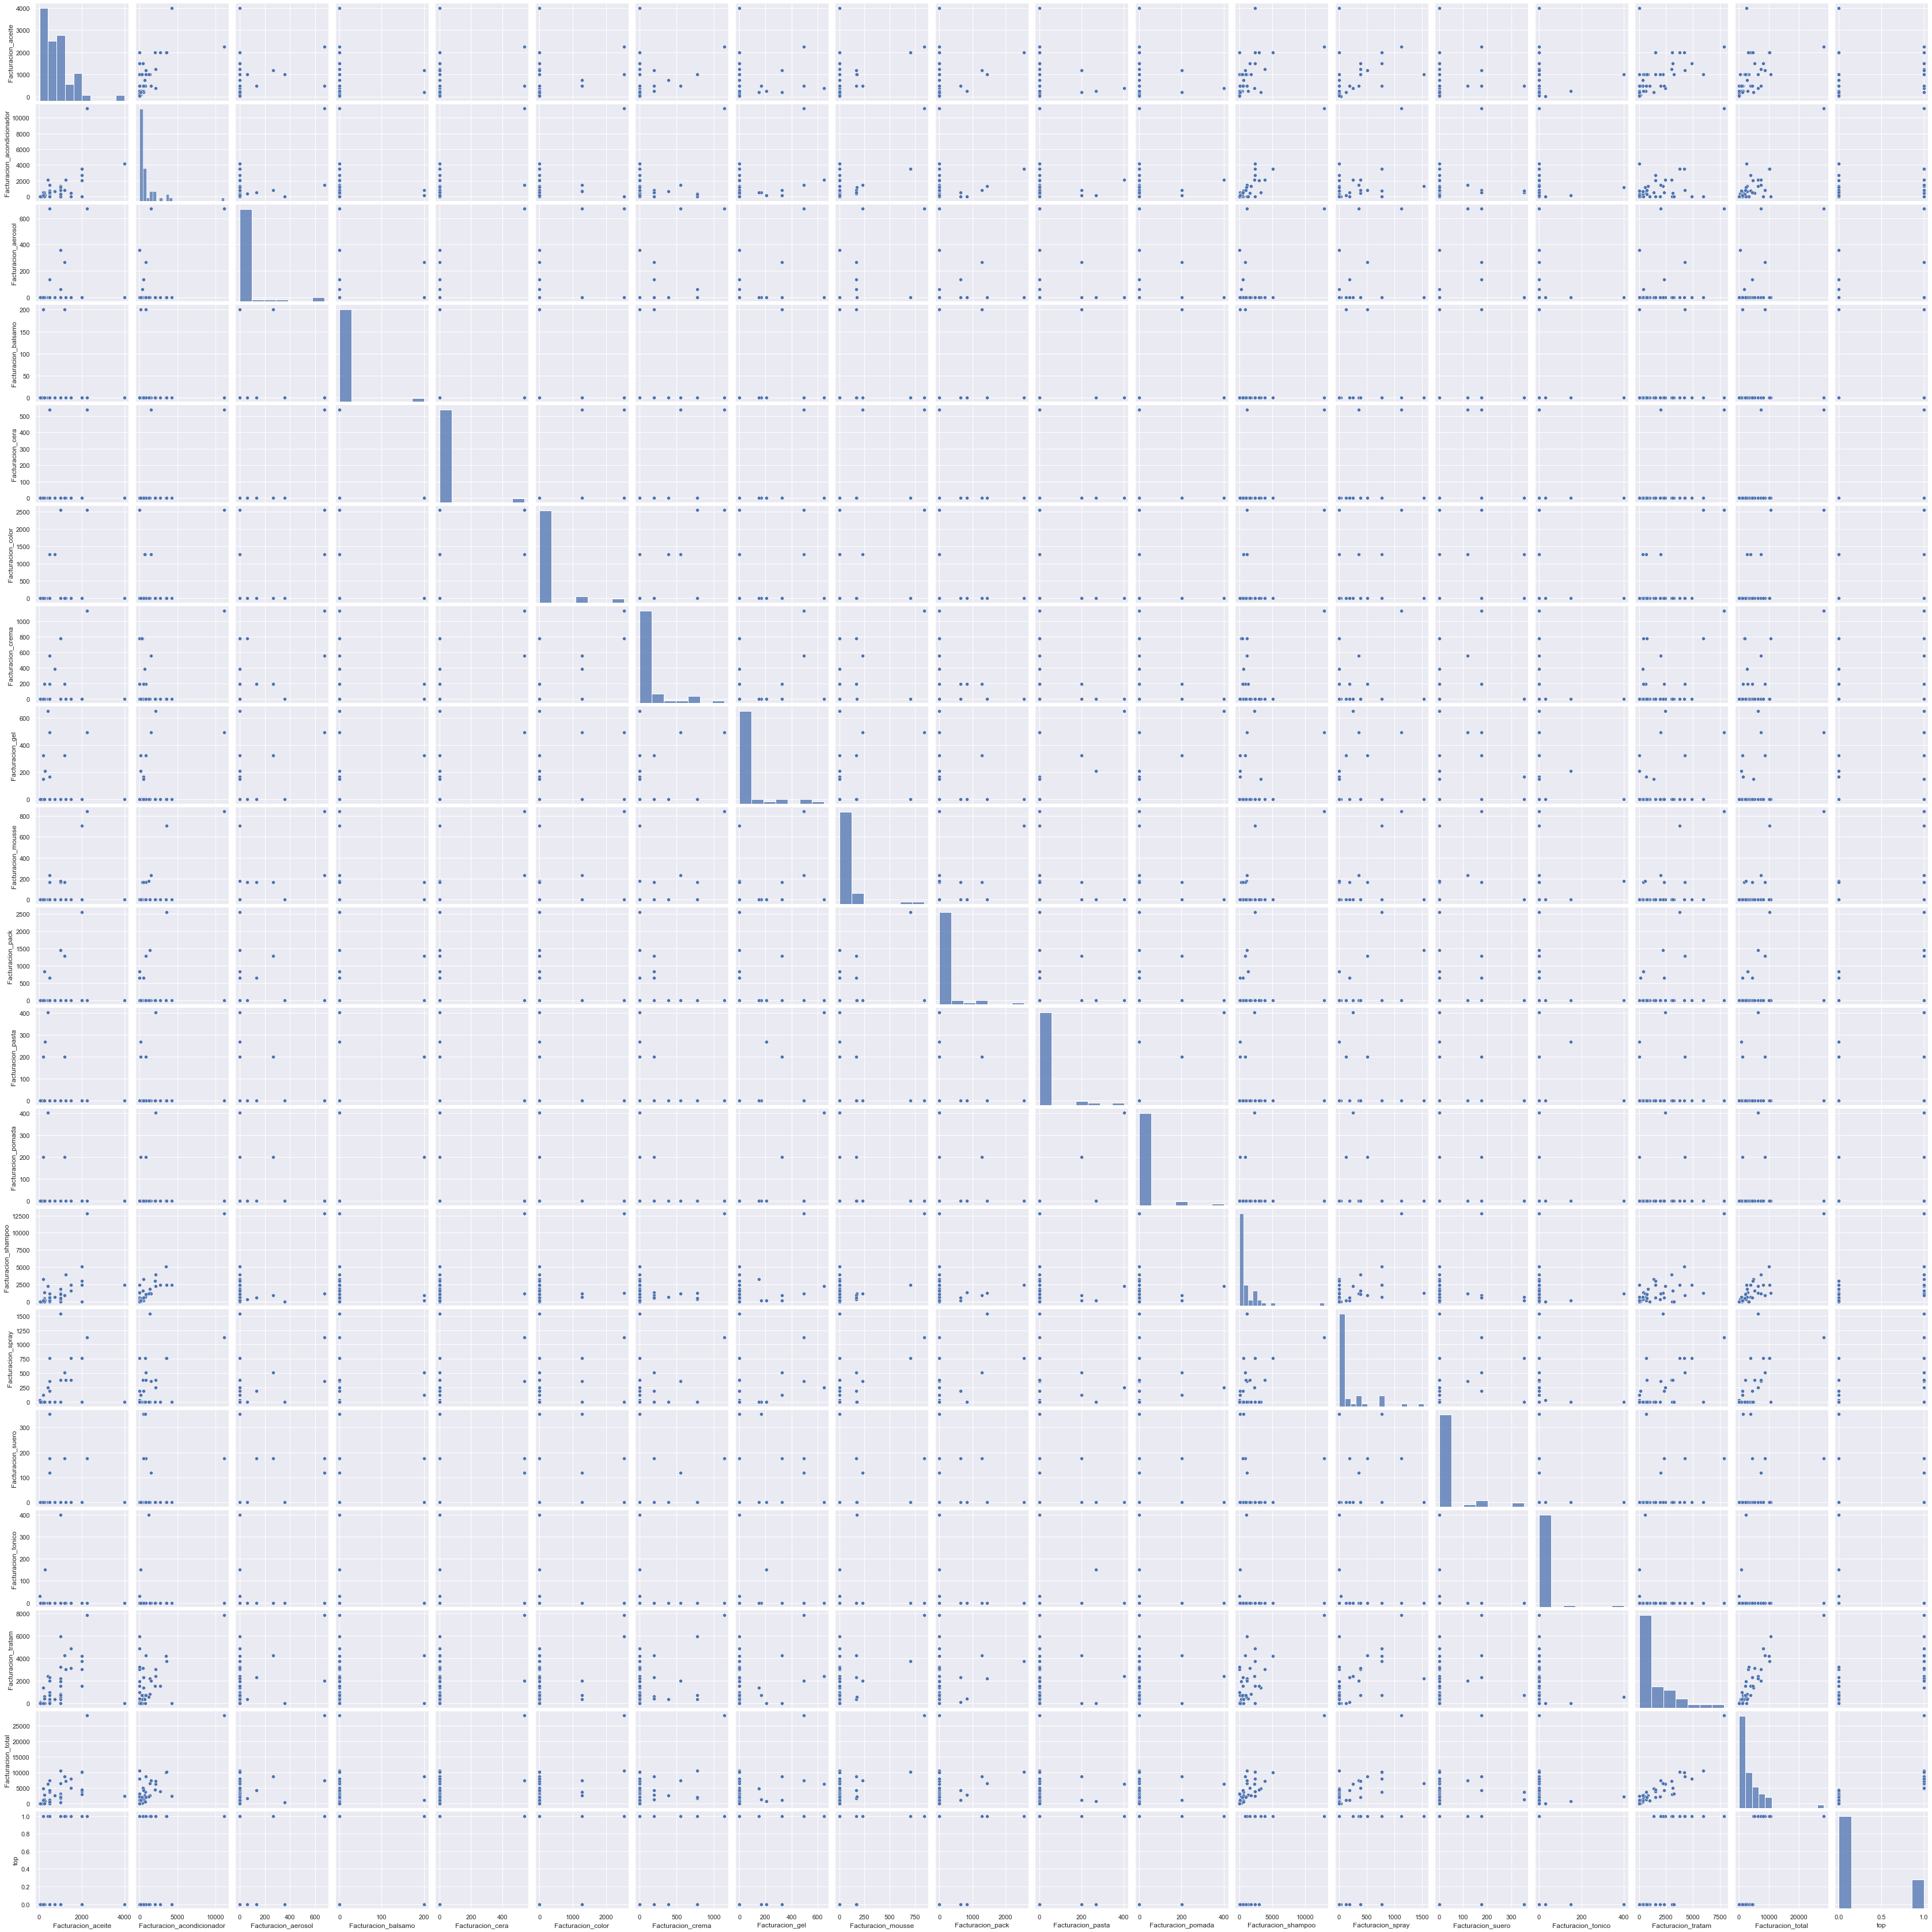

In [89]:
sns.pairplot(comport);

# Machine Learning

Basket Market

In [90]:
!pip install mlxtend

In [91]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SHAMPOO'),
  Text(1, 0, 'TRATAM'),
  Text(2, 0, 'ACONDICIONADOR'),
  Text(3, 0, 'COLOR'),
  Text(4, 0, 'ACEITE'),
  Text(5, 0, 'AEROSOL'),
  Text(6, 0, 'GEL'),
  Text(7, 0, 'PACK'),
  Text(8, 0, 'SPRAY'),
  Text(9, 0, 'CREMA')])

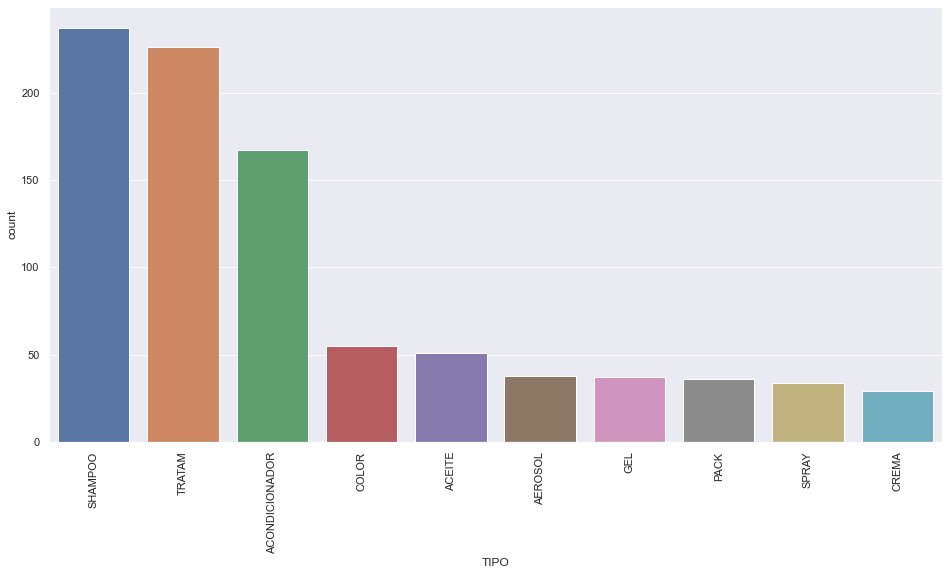

In [92]:
plt.figure(figsize=(16, 8))  
sns.countplot(x = 'TIPO', data = ventas, order = ventas['TIPO'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [93]:
df = ventas.groupby(['id_venta','TIPO']).size().reset_index(name='count')
basket = (df.groupby(['id_venta','TIPO'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id_venta'))
basket

TIPO          ACEITE  ACONDICIONADOR  AEROSOL  BALSAMO  CERA  COLOR  CREMA  \
id_venta                                                                     
202001312562     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001323018     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001333423     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001356384     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
20200136107      0.0             0.0      1.0      0.0   0.0    0.0    0.0   
202001364042     1.0             2.0      0.0      0.0   0.0    0.0    1.0   
202001376688     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
20200138363      0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001395789     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001416635     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001430525     1.0             1.0      1.0      0.0   0.0    0.0    1.0   
202001431220     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
202001431290     0.0             1.0      0.0      0.0   1.0    5.0    1.0   
202001433704     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001436014     1.0             3.0      0.0      0.0   0.0    0.0    0.0   
202001441466     1.0             0.0      0.0      0.0   0.0    5.0    1.0   
202001443721     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
202001445115     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001449167     0.0             0.0      0.0      0.0   0.0    0.0    1.0   
202001450017     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
202001450875     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001451178     0.0             0.0      2.0      0.0   0.0    0.0    0.0   
20200148078      0.0             1.0      0.0      0.0   0.0    0.0    0.0   
20200153539      0.0             0.0      0.0      0.0   0.0    0.0    0.0   
20200163634      1.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001802281     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
202001805062     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001805508     1.0             1.0      0.0      0.0   0.0    0.0    0.0   
202001806312     1.0             0.0      0.0      0.0   0.0    0.0    0.0   
202001806976     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
202001808399     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
20200212471      0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202002311414     0.0             0.0      1.0      0.0   0.0    0.0    0.0   
202002315418     0.0             0.0      0.0      0.0   0.0    0.0    1.0   
202002323018     0.0             0.0      2.0      0.0   0.0    3.0    0.0   
202002328399     0.0             1.0      0.0      0.0   0.0    0.0    0.0   
202002339093     0.0             0.0      2.0      0.0   0.0    0.0    0.0   
20200235749      0.0             0.0      1.0      0.0   0.0    0.0    0.0   
20200236080      0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202002363470     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202002364042     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
20200238212      0.0             1.0      0.0      0.0   0.0    0.0    0.0   
20200238306      0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202002395789     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202002401333     0.0             3.0      0.0      0.0   0.0    0.0    0.0   
202002410761     0.0             5.0      1.0      0.0   0.0    0.0    1.0   
202002418096     1.0             1.0      0.0      0.0   0.0    0.0    0.0   
202002422956     0.0             0.0      0.0      0.0   0.0    0.0    0.0   
202002426902     0.0             1.0      0.0      0.0   2.0    0.0    0.0   
202002431290     1.0  

Adecuamos el dataset para generar un valor dummy que sean 1 o 0

In [94]:
df = ventas.groupby(['id_venta','TIPO']).size().reset_index(name='count')
basket = (df.groupby(['id_venta', 'TIPO'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id_venta'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [95]:
basket_sets

TIPO          ACEITE  ACONDICIONADOR  AEROSOL  BALSAMO  CERA  COLOR  CREMA  \
id_venta                                                                     
202001312562       0               0        0        0     0      0      0   
202001323018       0               0        0        0     0      0      0   
202001333423       0               0        0        0     0      0      0   
202001356384       0               0        0        0     0      0      0   
20200136107        0               0        1        0     0      0      0   
202001364042       1               1        0        0     0      0      1   
202001376688       0               1        0        0     0      0      0   
20200138363        0               0        0        0     0      0      0   
202001395789       0               0        0        0     0      0      0   
202001416635       0               0        0        0     0      0      0   
202001430525       1               1        1        0     0      0      1   
202001431220       0               1        0        0     0      0      0   
202001431290       0               1        0        0     1      1      1   
202001433704       0               0        0        0     0      0      0   
202001436014       1               1        0        0     0      0      0   
202001441466       1               0        0        0     0      1      1   
202001443721       0               1        0        0     0      0      0   
202001445115       0               0        0        0     0      0      0   
202001449167       0               0        0        0     0      0      1   
202001450017       0               1        0        0     0      0      0   
202001450875       0               0        0        0     0      0      0   
202001451178       0               0        1        0     0      0      0   
20200148078        0               1        0        0     0      0      0   
20200153539        0               0        0        0     0      0      0   
20200163634        1               0        0        0     0      0      0   
202001802281       0               1        0        0     0      0      0   
202001805062       0               0        0        0     0      0      0   
202001805508       1               1        0        0     0      0      0   
202001806312       1               0        0        0     0      0      0   
202001806976       0               1        0        0     0      0      0   
202001808399       0               1        0        0     0      0      0   
20200212471        0               0        0        0     0      0      0   
202002311414       0               0        1        0     0      0      0   
202002315418       0               0        0        0     0      0      1   
202002323018       0               0        1        0     0      1      0   
202002328399       0               1        0        0     0      0      0   
202002339093       0               0        1        0     0      0      0   
20200235749        0               0        1        0     0      0      0   
20200236080        0               0        0        0     0      0      0   
202002363470       0               0        0        0     0      0      0   
202002364042       0               0        0        0     0      0      0   
20200238212        0               1        0        0     0      0      0   
20200238306        0               0        0        0     0      0      0   
202002395789       0               0        0        0     0      0      0   
202002401333       0               1        0        0     0      0      0   
202002410761       0               1        1        0     0      0      1   
202002418096       1               1        0        0     0      0      0   
202002422956       0               0        0        0     0      0      0   
202002426902       0               1        0        0     1      0      0   
202002431290       1  

Apriori Reglas de asociación

In [96]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

antecedents  \
12157          (AEROSOL, CERA, ACONDICIONADOR)   
45489            (SHAMPOO, GEL, CREMA, ACEITE)   
38365            (COLOR, CREMA, TRATAM, SPRAY)   
38367               (CERA, COLOR, GEL, TRATAM)   
38368              (COLOR, GEL, CREMA, TRATAM)   
38369             (COLOR, CERA, CREMA, TRATAM)   
38370                (CERA, GEL, CREMA, SPRAY)   
15602  (MOUSSE, ACONDICIONADOR, CREMA, TRATAM)   
38371                (CERA, COLOR, GEL, SPRAY)   
38372               (COLOR, GEL, CREMA, SPRAY)   

                          consequents  antecedent support  consequent support  \
12157                 (MOUSSE, CREMA)            0.012295            0.045082   
45489  (SUERO, ACONDICIONADOR, SPRAY)            0.012295            0.020492   
38365                     (CERA, GEL)            0.012295            0.020492   
38367                  (CREMA, SPRAY)            0.012295            0.032787   
38368                   (CERA, SPRAY)            0.012295            0.012295   
38369                    (GEL, SPRAY)            0.012295            0.036885   
38370                 (COLOR, TRATAM)            0.012295            0.049180   
15602                       (SHAMPOO)            0.036885            0.549180   
38371                 (CREMA, TRATAM)            0.012295            0.081967   
38372                  (CERA, TRATAM)            0.012295            0.020492   

        support  confidence       lift  leverage  conviction  
12157  0.012295         1.0  22.181818  0.011741         inf  
45489  0.012295         1.0  48.800000  0.012043         inf  
38365  0.012295         1.0  48.800000  0.012043         inf  
38367  0.012295         1.0  30.500000  0.011892         inf  
38368  0.012295         1.0  81.333333  0.012144         inf  
38369  0.012295         1.0  27.111111  0.011842         inf  
38370  0.012295         1.0  20.333333  0.011690         inf  
15602  0.036885         1.0   1.820896  0.016629         inf  
38371  0.012295         1.0  12.200000  0.011287         inf  
38372  0.012295         1.0  48.800000  0.012043         inf

In [97]:
rules.shape

(81418, 9)

In [98]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5)].head(20)


antecedents  \
12157          (AEROSOL, CERA, ACONDICIONADOR)   
45489            (SHAMPOO, GEL, CREMA, ACEITE)   
38365            (COLOR, CREMA, TRATAM, SPRAY)   
38367               (CERA, COLOR, GEL, TRATAM)   
38368              (COLOR, GEL, CREMA, TRATAM)   
38369             (COLOR, CERA, CREMA, TRATAM)   
38370                (CERA, GEL, CREMA, SPRAY)   
15602  (MOUSSE, ACONDICIONADOR, CREMA, TRATAM)   
38371                (CERA, COLOR, GEL, SPRAY)   
38372               (COLOR, GEL, CREMA, SPRAY)   
15598         (SHAMPOO, CREMA, MOUSSE, TRATAM)   
38373              (COLOR, CERA, CREMA, SPRAY)   
38374                (CERA, COLOR, GEL, CREMA)   
75129            (AEROSOL, GEL, CREMA, ACEITE)   
38376                    (CERA, TRATAM, SPRAY)   
75130   (AEROSOL, GEL, ACONDICIONADOR, ACEITE)   
38383                    (COLOR, CERA, TRATAM)   
38385                       (CERA, GEL, SPRAY)   
38387                      (COLOR, GEL, SPRAY)   
38388                     (CERA, CREMA, SPRAY)   

                                           consequents  antecedent support  \
12157                                  (MOUSSE, CREMA)            0.012295   
45489                   (SUERO, ACONDICIONADOR, SPRAY)            0.012295   
38365                                      (CERA, GEL)            0.012295   
38367                                   (CREMA, SPRAY)            0.012295   
38368                                    (CERA, SPRAY)            0.012295   
38369                                     (GEL, SPRAY)            0.012295   
38370                                  (COLOR, TRATAM)            0.012295   
15602                                        (SHAMPOO)            0.036885   
38371                                  (CREMA, TRATAM)            0.012295   
38372                                   (CERA, TRATAM)            0.012295   
15598                                 (ACONDICIONADOR)            0.036885   
38373                                    (GEL, TRATAM)            0.012295   
38374                                  (TRATAM, SPRAY)            0.012295   
75129  (SHAMPOO, SPRAY, SUERO, MOUSSE, ACONDICIONADOR)            0.012295   
38376                              (COLOR, GEL, CREMA)            0.012295   
75130           (SHAMPOO, SPRAY, SUERO, MOUSSE, CREMA)            0.012295   
38383                              (GEL, CREMA, SPRAY)            0.012295   
38385                           (COLOR, CREMA, TRATAM)            0.012295   
38387                            (CERA, CREMA, TRATAM)            0.012295   
38388                             (COLOR, GEL, TRATAM)            0.012295   

       consequent support   support  confidence       lift  leverage  \
12157            0.045082  0.012295         1.0  22.181818  0.011741   
45489            0.020492  0.012295         1.0  48.800000  0.012043   
38365            0.020492  0.012295         1.0  48.800000  0.012043   
38367            0.032787  0.012295         1.0  30.500000  0.011892   
38368            0.012295  0.012295         1.0  81.333333  0.012144   
38369            0.036885  0.012295         1.0  27.111111  0.011842   
38370            0.049180  0.012295         1.0  20.333333  0.011690   
15602            0.549180  0.036885         1.0   1.820896  0.016629   
38371            0.081967  0.012295         1.0  12.200000  0.011287   
38372            0.020492  0.012295         1.0  48.800000  0.012043   
15598            0.409836  0.036885         1.0   2.440000  0.021768   
38373            0.053279  0.012295         1.0  18.769231  0.011640   
38374            0.094262  0.012295         1.0  10.608696  0.011136   
75129            0.016393  0.012295         1.0  61.000000  0.012094   
38376            0.012295  0.012295         1.0  81.333333  0.012144   
75130            0.016393  0.012295         1.0  61.000000  0.012094   
38383            0.020492  0.012295         1.0  48.800000  0.012043   
38385            0.020492  0.012295         1.0  

In [99]:
#rules.to_excel('asociacion.xlsx')

Modelos No Supervisados

In [100]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from IPython.display import display # Allows the use of display() for DataFrames


In [101]:
comport1 = comport.copy()

In [102]:
comport1 = comport1.drop(['id_venta','Mes','Ano_Mes','Facturacion_total','top'], axis=1) #eliminamos columnas que no se usan


In [103]:
comport1

Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0               249.57                      509.31                 0.00   
1               998.28                      371.64                59.83   
2              3993.12                     4202.88                 0.00   
3               998.28                        0.00                 0.00   
4                72.62                        0.00                 0.00   
5                72.62                      108.15                 0.00   
6               224.61                        0.00                 0.00   
7               499.14                      339.54                 0.00   
8               499.14                      514.71                 0.00   
9                74.87                        0.00                 0.00   
10               72.62                        0.00                 0.00   
11              401.70                     2107.38                 0.00   
12             1996.56                     2716.32                 0.00   
13              499.14                        0.00                 0.00   
14             1996.56                        0.00                 0.00   
15              249.57                        0.00                 0.00   
16               29.93                        0.00                 0.00   
17              998.28                        0.00                 0.00   
18              249.57                        0.00                 0.00   
19              998.28                     1358.16                 0.00   
20              499.14                      743.28                 0.00   
21              998.28                        0.00                 0.00   
22              200.85                      495.52                 0.00   
23              249.57                      350.34                 0.00   
24              499.14                     1480.78               671.31   
25              998.28                     1358.16                 0.00   
26             1247.85                     2144.64                 0.00   
27              998.28                        0.00               358.98   
28              998.28                     1199.04                 0.00   
29              998.28                        0.00                 0.00   
30             1996.56                     3481.20                 0.00   
31              499.14                      700.68                 0.00   
32             1996.56                     2037.24                 0.00   
33              748.71                      700.68                 0.00   
34              499.14                        0.00                 0.00   
35             1497.42                      421.77                 0.00   
36              149.74                        0.00                 0.00   
37              499.14                        0.00                 0.00   
38             2246.13                    11170.05               671.31   
39             1199.13                      809.07               265.68   
40              998.28                      281.18                 0.00   
41              267.80                      166.12                 0.00   
42               60.25                        0.00                 0.00   
43             1497.42                        0.00                 0.00   
44             1996.56                     3535.99                 0.00   
45              499.14                      743.28                 0.00   
46              998.28                      793.41                 0.00   
47              249.57                        0.00                 0.00   
48              499.14                      514.71               132.84   
49              200.85                      124.59                 0.00   

    Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.00              0.00                0.0   
1                  0.00              0.00         

In [104]:
comport1 = comport1.fillna(0)
comport1

Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0               249.57                      509.31                 0.00   
1               998.28                      371.64                59.83   
2              3993.12                     4202.88                 0.00   
3               998.28                        0.00                 0.00   
4                72.62                        0.00                 0.00   
5                72.62                      108.15                 0.00   
6               224.61                        0.00                 0.00   
7               499.14                      339.54                 0.00   
8               499.14                      514.71                 0.00   
9                74.87                        0.00                 0.00   
10               72.62                        0.00                 0.00   
11              401.70                     2107.38                 0.00   
12             1996.56                     2716.32                 0.00   
13              499.14                        0.00                 0.00   
14             1996.56                        0.00                 0.00   
15              249.57                        0.00                 0.00   
16               29.93                        0.00                 0.00   
17              998.28                        0.00                 0.00   
18              249.57                        0.00                 0.00   
19              998.28                     1358.16                 0.00   
20              499.14                      743.28                 0.00   
21              998.28                        0.00                 0.00   
22              200.85                      495.52                 0.00   
23              249.57                      350.34                 0.00   
24              499.14                     1480.78               671.31   
25              998.28                     1358.16                 0.00   
26             1247.85                     2144.64                 0.00   
27              998.28                        0.00               358.98   
28              998.28                     1199.04                 0.00   
29              998.28                        0.00                 0.00   
30             1996.56                     3481.20                 0.00   
31              499.14                      700.68                 0.00   
32             1996.56                     2037.24                 0.00   
33              748.71                      700.68                 0.00   
34              499.14                        0.00                 0.00   
35             1497.42                      421.77                 0.00   
36              149.74                        0.00                 0.00   
37              499.14                        0.00                 0.00   
38             2246.13                    11170.05               671.31   
39             1199.13                      809.07               265.68   
40              998.28                      281.18                 0.00   
41              267.80                      166.12                 0.00   
42               60.25                        0.00                 0.00   
43             1497.42                        0.00                 0.00   
44             1996.56                     3535.99                 0.00   
45              499.14                      743.28                 0.00   
46              998.28                      793.41                 0.00   
47              249.57                        0.00                 0.00   
48              499.14                      514.71               132.84   
49              200.85                      124.59                 0.00   

    Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.00              0.00                0.0   
1                  0.00              0.00         

Implementación: detección de valores atípicos
La detección de valores atípicos en los datos es extremadamente importante en el paso de preprocesamiento de datos de cualquier análisis. La presencia de valores atípicos a menudo puede sesgar los resultados que toman en consideración estos puntos de datos. El * paso atípico * se calcula como 1.5 veces el rango intercuartílico (IQR). Un punto de datos con una característica que está más allá de un paso atípico fuera del IQR para esa característica se considera anormal.

En el siguiente bloque de código:

Asigne el valor del percentil 25 para la característica dada a Q1. Use np.percentile para esto.
Asigne el valor del percentil 75 para la característica dada a Q3. Nuevamente, use np.percentile.
Asignar el cálculo de un paso atípico para la característica dada a paso.
Opcionalmente eliminar puntos de datos del conjunto de datos al agregar índices a la lista outliers

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(comport1)
standarizar = scaler.transform(comport1)
standarizar1 = pd.DataFrame(standarizar,columns=list(comport1.columns))
zscore_df = standarizar1
zscore_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facturacion_aceite          50 non-null     float64
 1   Facturacion_acondicionador  50 non-null     float64
 2   Facturacion_aerosol         50 non-null     float64
 3   Facturacion_balsamo         50 non-null     float64
 4   Facturacion_cera            50 non-null     float64
 5   Facturacion_color           50 non-null     float64
 6   Facturacion_crema           50 non-null     float64
 7   Facturacion_gel             50 non-null     float64
 8   Facturacion_mousse          50 non-null     float64
 9   Facturacion_pack            50 non-null     float64
 10  Facturacion_pasta           50 non-null     float64
 11  Facturacion_pomada          50 non-null     float64
 12  Facturacion_shampoo         50 non-null     float64
 13  Facturacion_spray           50 non-nu

In [106]:
r = zscore_df
Q1 = r.quantile(0.25)
Q3 = r.quantile(0.75)
IQR = Q3 - Q1
#print(Q1)
#print(Q3)
#print(IQR)
Data_SO = r[~((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
Data_CO = r[((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Data_SO.shape,Data_CO.shape)

(22, 17) (28, 17)


Algoritmos No Supervisados
Comenzamos con K-means

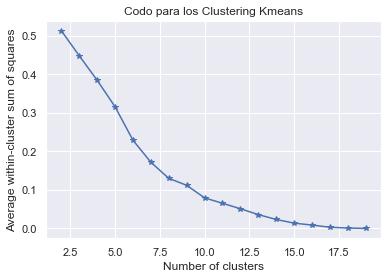

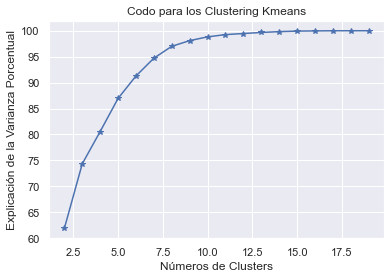

In [107]:
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

DATA= Data_SO #cambian el dataframe

K = range(2,20)
KM = [KMeans(n_clusters=k,random_state=10).fit(DATA.values) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(DATA.values, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/DATA.values.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = np.sum((DATA.values-DATA.values.mean(0))**2)
bss = tss-wcss

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')

plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Codo para los Clustering Kmeans')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Números de Clusters')
plt.ylabel('Explicación de la Varianza Porcentual')
plt.title('Codo para los Clustering Kmeans')
plt.show()

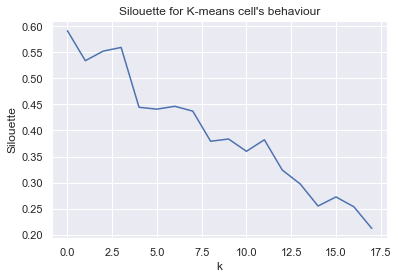

In [108]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
s = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(Data_SO.values)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(DATA.values, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
#sns.despine()
plt.show()

Comparar CLUSTERING ALGORITHMS

In [109]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

k_clusters = 5
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters,random_state=10)
algorithms['affinity'] = AffinityPropagation(damping=0.6)
algorithms['DBSCAN'] =   DBSCAN(eps=0.6)



for model in algorithms.values():
    print(model)
    model.fit(DATA)
    results.append(list(model.labels_))

KMeans(n_clusters=5, random_state=10)
AffinityPropagation(damping=0.6)
DBSCAN(eps=0.6)


METRICS & PLOTTING

In [110]:
metricas = []

# Append the results into lists
for i in range(3):
    metricas.append(silhouette_score(Data_SO.values, results[i], metric='euclidean'))

xlabels = list(algorithms.keys())
xlabels
resultados = pd.concat([pd.DataFrame(xlabels,columns=['algorithms']),pd.DataFrame(metricas,columns=['Metricas'])],axis=1)
resultados

algorithms  Metricas
0     kmeans  0.559488
1   affinity  0.440967
2     DBSCAN  0.591517

In [111]:
Data_SO.reset_index(inplace=True)
Data_CO.reset_index(inplace=True)

In [112]:
Data_SO_ = Data_SO.drop(['index'],axis=1)

kmeans = KMeans(n_clusters=5,random_state=10)
kmeans.fit(Data_SO_.values)
centroids = kmeans.cluster_centers_
kmeans.labels_

PERFIL =  pd.DataFrame({'PERFIL':kmeans.labels_})
data_SO1 = pd.concat([Data_SO.reset_index(drop=True), PERFIL], axis=1)
data_SO1.head(23)

index  Facturacion_aceite  Facturacion_acondicionador  \
0       4           -0.997642                   -0.510606   
1       5           -0.997642                   -0.449895   
2       6           -0.797232                   -0.510606   
3       7           -0.435244                   -0.320004   
4       9           -0.994675                   -0.510606   
5      10           -0.997642                   -0.510606   
6      13           -0.435244                   -0.510606   
7      14            1.539213                   -0.510606   
8      17            0.222908                   -0.510606   
9      18           -0.764320                   -0.510606   
10     21            0.222908                   -0.510606   
11     23           -0.764320                   -0.313941   
12     25            0.222908                    0.251803   
13     29            0.222908                   -0.510606   
14     31           -0.435244                   -0.117276   
15     34           -0.435244                   -0.510606   
16     35            0.881060                   -0.273843   
17     36           -0.895953                   -0.510606   
18     42           -1.013952                   -0.510606   
19     45           -0.435244                   -0.093362   
20     46            0.222908                   -0.065222   
21     47           -0.764320                   -0.510606   

    Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0             -0.301174            -0.204124         -0.204124   
1             -0.301174            -0.204124         -0.204124   
2             -0.301174            -0.204124         -0.204124   
3             -0.301174            -0.204124         -0.204124   
4             -0.301174            -0.204124         -0.204124   
5             -0.301174            -0.204124         -0.204124   
6             -0.301174            -0.204124         -0.204124   
7             -0.301174            -0.204124         -0.204124   
8             -0.301174            -0.204124         -0.204124   
9             -0.301174            -0.204124         -0.204124   
10            -0.301174            -0.204124         -0.204124   
11            -0.301174            -0.204124         -0.204124   
12            -0.301174            -0.204124         -0.204124   
13            -0.301174            -0.204124         -0.204124   
14            -0.301174            -0.204124         -0.204124   
15            -0.301174            -0.204124         -0.204124   
16            -0.301174            -0.204124         -0.204124   
17            -0.301174            -0.204124         -0.204124   
18            -0.301174            -0.204124         -0.204124   
19            -0.301174            -0.204124         -0.204124   
20            -0.301174            -0.204124         -0.204124   
21            -0.301174            -0.204124         -0.204124   

    Facturacion_color  Facturacion_crema  Facturacion_gel  Facturacion_mousse  \
0           -0.312737          -0.411723        -0.386887            -0.31003   
1           -0.312737          -0.411723        -0.386887            -0.31003   
2           -0.312737          -0.411723        -0.386887            -0.31003   
3           -0.312737          -0.411723        -0.386887            -0.31003   
4           -0.312737          -0.411723        -0.386887            -0.31003   
5           -0.312737          -0.411723        -0.386887            -0.31003   
6           -0.312737          -0.411723        -0.386887            -0.31003   
7           -0.312737          -0.411723        -0.386887            -0.31003   
8           -0.312737          -0.411723        -0.386887            -0.31003   
9           -0.312737          -0.411723        -0.386887            -0.31003   
10          -0.312737          -0.411723        -0.386887            -0.31003   
11          -0.312737          -0.411723        -0.386887            -0.31003   
12          -0.312737       

In [113]:
data_SO1.shape

(22, 19)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

In [115]:


plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_SO1.Facturacion_shampoo, data_SO1.Facturacion_acondicionador, data_SO1.Facturacion_tratam, data_SO1.Facturacion_tratam, c=data_SO1.PERFIL)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

AttributeError: 'Path3DCollection' object has no attribute '_offsets3d'

<Figure size 1296x648 with 1 Axes>

Reasignación de outliters

In [116]:
Data_CO.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0           -0.764320                   -0.224702            -0.301174   
1      1            0.222908                   -0.301984             0.115948   
2      2            4.171822                    1.848699            -0.301174   
3      3            0.222908                   -0.510606            -0.301174   
4      8           -0.435244                   -0.221671            -0.301174   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.204124         -0.204124          -0.312737   
1            -0.204124         -0.204124          -0.312737   
2            -0.204124         -0.204124          -0.312737   
3            -0.204124         -0.204124           4.154934   
4            -0.204124         -0.204124          -0.312737   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0           0.358827        -0.386887           -0.310030         -0.320029   
1           2.670478        -0.386887            0.741497         -0.320029   
2          -0.411723        -0.386887           -0.310030         -0.320029   
3           2.670478        -0.386887           -0.310030         -0.320029   
4          -0.411723         0.758106           -0.310030         -0.320029   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.280918           -0.237356            -0.348448   
1          -0.280918           -0.237356            -0.404587   
2          -0.280918           -0.237356             0.614365   
3          -0.280918           -0.237356             0.026901   
4          -0.280918           -0.237356            -0.495314   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0          -0.514365          -0.338345            -0.19494   
1          -0.514365          -0.338345            -0.19494   
2          -0.514365          -0.338345            -0.19494   
3          -0.514365          -0.338345            -0.19494   
4          -0.514365           4.074851            -0.19494   

   Facturacion_tratam  
0           -0.424868  
1           -0.557761  
2           -0.774410  
3            2.611179  
4           -0.381235

In [117]:
Data_CO_ = Data_CO.drop(['index'],axis=1)
predict  = kmeans.predict(Data_CO_)
predict

PERFIL =  pd.DataFrame({'PERFIL':predict})
Data_CO1 = pd.concat([Data_CO.reset_index(drop=True), PERFIL], axis=1)
Data_CO1.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0           -0.764320                   -0.224702            -0.301174   
1      1            0.222908                   -0.301984             0.115948   
2      2            4.171822                    1.848699            -0.301174   
3      3            0.222908                   -0.510606            -0.301174   
4      8           -0.435244                   -0.221671            -0.301174   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.204124         -0.204124          -0.312737   
1            -0.204124         -0.204124          -0.312737   
2            -0.204124         -0.204124          -0.312737   
3            -0.204124         -0.204124           4.154934   
4            -0.204124         -0.204124          -0.312737   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0           0.358827        -0.386887           -0.310030         -0.320029   
1           2.670478        -0.386887            0.741497         -0.320029   
2          -0.411723        -0.386887           -0.310030         -0.320029   
3           2.670478        -0.386887           -0.310030         -0.320029   
4          -0.411723         0.758106           -0.310030         -0.320029   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.280918           -0.237356            -0.348448   
1          -0.280918           -0.237356            -0.404587   
2          -0.280918           -0.237356             0.614365   
3          -0.280918           -0.237356             0.026901   
4          -0.280918           -0.237356            -0.495314   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0          -0.514365          -0.338345            -0.19494   
1          -0.514365          -0.338345            -0.19494   
2          -0.514365          -0.338345            -0.19494   
3          -0.514365          -0.338345            -0.19494   
4          -0.514365           4.074851            -0.19494   

   Facturacion_tratam  PERFIL  
0           -0.424868       1  
1           -0.557761       3  
2           -0.774410       4  
3            2.611179       0  
4           -0.381235       1

In [118]:
Data_CO1.shape

(28, 19)

In [119]:
DATA_PERFIL_ESTAN = data_SO1.append(Data_CO1)
DATA_PERFIL_ESTAN.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      4           -0.997642                   -0.510606            -0.301174   
1      5           -0.997642                   -0.449895            -0.301174   
2      6           -0.797232                   -0.510606            -0.301174   
3      7           -0.435244                   -0.320004            -0.301174   
4      9           -0.994675                   -0.510606            -0.301174   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.204124         -0.204124          -0.312737   
1            -0.204124         -0.204124          -0.312737   
2            -0.204124         -0.204124          -0.312737   
3            -0.204124         -0.204124          -0.312737   
4            -0.204124         -0.204124          -0.312737   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0          -0.411723        -0.386887            -0.31003         -0.320029   
1          -0.411723        -0.386887            -0.31003         -0.320029   
2          -0.411723        -0.386887            -0.31003         -0.320029   
3          -0.411723        -0.386887            -0.31003         -0.320029   
4          -0.411723        -0.386887            -0.31003         -0.320029   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.280918           -0.237356            -0.570635   
1          -0.280918           -0.237356            -0.570635   
2          -0.280918           -0.237356            -0.570635   
3          -0.280918           -0.237356            -0.422510   
4          -0.280918           -0.237356            -0.570635   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0          -0.514365          -0.338345            -0.19494   
1          -0.514365          -0.338345            -0.19494   
2          -0.514365          -0.338345            -0.19494   
3          -0.514365          -0.338345            -0.19494   
4          -0.514365          -0.338345            -0.19494   

   Facturacion_tratam  PERFIL  
0           -0.774410       1  
1           -0.707182       1  
2           -0.774410       1  
3           -0.577822       1  
4           -0.774410       1

In [120]:
DATA_PERFIL_ESTAN.shape

(50, 19)

In [121]:
DATA_PERFIL_ESTAN

index  Facturacion_aceite  Facturacion_acondicionador  \
0       4           -0.997642                   -0.510606   
1       5           -0.997642                   -0.449895   
2       6           -0.797232                   -0.510606   
3       7           -0.435244                   -0.320004   
4       9           -0.994675                   -0.510606   
5      10           -0.997642                   -0.510606   
6      13           -0.435244                   -0.510606   
7      14            1.539213                   -0.510606   
8      17            0.222908                   -0.510606   
9      18           -0.764320                   -0.510606   
10     21            0.222908                   -0.510606   
11     23           -0.764320                   -0.313941   
12     25            0.222908                    0.251803   
13     29            0.222908                   -0.510606   
14     31           -0.435244                   -0.117276   
15     34           -0.435244                   -0.510606   
16     35            0.881060                   -0.273843   
17     36           -0.895953                   -0.510606   
18     42           -1.013952                   -0.510606   
19     45           -0.435244                   -0.093362   
20     46            0.222908                   -0.065222   
21     47           -0.764320                   -0.510606   
0       0           -0.764320                   -0.224702   
1       1            0.222908                   -0.301984   
2       2            4.171822                    1.848699   
3       3            0.222908                   -0.510606   
4       8           -0.435244                   -0.221671   
5      11           -0.563726                    0.672381   
6      12            1.539213                    1.014212   
7      15           -0.764320                   -0.510606   
8      16           -1.053932                   -0.510606   
9      19            0.222908                    0.251803   
10     20           -0.435244                   -0.093362   
11     22           -0.828561                   -0.232444   
12     24           -0.435244                    0.320636   
13     26            0.551984                    0.693297   
14     27            0.222908                   -0.510606   
15     28            0.222908                    0.162480   
16     30            1.539213                    1.443581   
17     32            1.539213                    0.633008   
18     33           -0.106168                   -0.117276   
19     37           -0.435244                   -0.510606   
20     38            1.868289                    5.759749   
21     39            0.487743                   -0.056431   
22     40            0.222908                   -0.352764   
23     41           -0.740283                   -0.417354   
24     43            0.881060                   -0.510606   
25     44            1.539213                    1.474337   
26     48           -0.435244                   -0.221671   
27     49           -0.828561                   -0.440667   

    Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0             -0.301174            -0.204124         -0.204124   
1             -0.301174            -0.204124         -0.204124   
2             -0.301174            -0.204124         -0.204124   
3             -0.301174            -0.204124         -0.204124   
4             -0.301174            -0.204124         -0.204124   
5             -0.301174            -0.204124         -0.204124   
6             -0.301174            -0.204124         -0.204124   
7             -0.301174            -0.204124         -0.204124   
8             -0.301174            -0.204124         -0.204124   
9             -0.301174            -0.204124         -0.204124   
10            -0.301174            -0.204124         -0.204124   
11            -0.301174            -0.204124         -0.204124   
12            -0.301174           

In [122]:
comport1

Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0               249.57                      509.31                 0.00   
1               998.28                      371.64                59.83   
2              3993.12                     4202.88                 0.00   
3               998.28                        0.00                 0.00   
4                72.62                        0.00                 0.00   
5                72.62                      108.15                 0.00   
6               224.61                        0.00                 0.00   
7               499.14                      339.54                 0.00   
8               499.14                      514.71                 0.00   
9                74.87                        0.00                 0.00   
10               72.62                        0.00                 0.00   
11              401.70                     2107.38                 0.00   
12             1996.56                     2716.32                 0.00   
13              499.14                        0.00                 0.00   
14             1996.56                        0.00                 0.00   
15              249.57                        0.00                 0.00   
16               29.93                        0.00                 0.00   
17              998.28                        0.00                 0.00   
18              249.57                        0.00                 0.00   
19              998.28                     1358.16                 0.00   
20              499.14                      743.28                 0.00   
21              998.28                        0.00                 0.00   
22              200.85                      495.52                 0.00   
23              249.57                      350.34                 0.00   
24              499.14                     1480.78               671.31   
25              998.28                     1358.16                 0.00   
26             1247.85                     2144.64                 0.00   
27              998.28                        0.00               358.98   
28              998.28                     1199.04                 0.00   
29              998.28                        0.00                 0.00   
30             1996.56                     3481.20                 0.00   
31              499.14                      700.68                 0.00   
32             1996.56                     2037.24                 0.00   
33              748.71                      700.68                 0.00   
34              499.14                        0.00                 0.00   
35             1497.42                      421.77                 0.00   
36              149.74                        0.00                 0.00   
37              499.14                        0.00                 0.00   
38             2246.13                    11170.05               671.31   
39             1199.13                      809.07               265.68   
40              998.28                      281.18                 0.00   
41              267.80                      166.12                 0.00   
42               60.25                        0.00                 0.00   
43             1497.42                        0.00                 0.00   
44             1996.56                     3535.99                 0.00   
45              499.14                      743.28                 0.00   
46              998.28                      793.41                 0.00   
47              249.57                        0.00                 0.00   
48              499.14                      514.71               132.84   
49              200.85                      124.59                 0.00   

    Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.00              0.00                0.0   
1                  0.00              0.00         

In [123]:
comport1.reset_index(inplace=True)
comport1.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0              249.57                      509.31                 0.00   
1      1              998.28                      371.64                59.83   
2      2             3993.12                     4202.88                 0.00   
3      3              998.28                        0.00                 0.00   
4      4               72.62                        0.00                 0.00   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0               0.0                0.0   
1                  0.0               0.0                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0             2542.8   
4                  0.0               0.0                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0             194.07              0.0                0.00               0.0   
1             776.28              0.0              166.53               0.0   
2               0.00              0.0                0.00               0.0   
3             776.28              0.0                0.00               0.0   
4               0.00              0.0                0.00               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0                450.0   
1                0.0                 0.0                336.3   
2                0.0                 0.0               2400.0   
3                0.0                 0.0               1210.2   
4                0.0                 0.0                  0.0   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0                0.0                0.0                 0.0   
1                0.0                0.0                 0.0   
2                0.0                0.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 0.0   

   Facturacion_tratam  
0              615.24  
1              381.33  
2                0.00  
3             5959.08  
4                0.00

In [124]:
DATA_PERFIL_FINAL = pd.merge(comport1,DATA_PERFIL_ESTAN[['index','PERFIL']],on=['index'],how='inner')
DATA_PERFIL_FINAL.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0              249.57                      509.31                 0.00   
1      1              998.28                      371.64                59.83   
2      2             3993.12                     4202.88                 0.00   
3      3              998.28                        0.00                 0.00   
4      4               72.62                        0.00                 0.00   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0               0.0                0.0   
1                  0.0               0.0                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0             2542.8   
4                  0.0               0.0                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0             194.07              0.0                0.00               0.0   
1             776.28              0.0              166.53               0.0   
2               0.00              0.0                0.00               0.0   
3             776.28              0.0                0.00               0.0   
4               0.00              0.0                0.00               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0                450.0   
1                0.0                 0.0                336.3   
2                0.0                 0.0               2400.0   
3                0.0                 0.0               1210.2   
4                0.0                 0.0                  0.0   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0                0.0                0.0                 0.0   
1                0.0                0.0                 0.0   
2                0.0                0.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 0.0   

   Facturacion_tratam  PERFIL  
0              615.24       1  
1              381.33       3  
2                0.00       4  
3             5959.08       0  
4                0.00       1

Descripción de los perfiles

In [125]:
DESCRIPCION_ = DATA_PERFIL_FINAL.drop(['index'],axis=1)
DESCRIPCION_ = DESCRIPCION_.groupby(['PERFIL'], as_index=False).mean()
conteo = 100 * DATA_PERFIL_FINAL['PERFIL'].value_counts() / len(DATA_PERFIL_FINAL['PERFIL'])
conteo = pd.DataFrame(conteo)
conteo
conteo = conteo.rename(index=str, columns={"PERFIL": "CANTIDAD%"})
CANTIDAD =  conteo.sort_index(axis=0, level=None, ascending=True)
DESCRIPCION_FINAL = pd.concat([CANTIDAD.reset_index(drop=True), DESCRIPCION_], axis=1)
DESCRIPCION_FINAL 

CANTIDAD%  PERFIL  Facturacion_aceite  Facturacion_acondicionador  \
0       18.0       0         1519.736667                 2546.764444   
1       48.0       1          321.447083                  177.391667   
2        8.0       2          873.495000                  128.677500   
3       22.0       3          962.304545                 1234.904545   
4        4.0       4         2994.840000                 2101.440000   

   Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0           104.110000            22.316667         59.793333   
1            14.957500             8.368750          0.000000   
2            33.210000             0.000000          0.000000   
3            66.467273             0.000000         48.921818   
4             0.000000             0.000000          0.000000   

   Facturacion_color  Facturacion_crema  Facturacion_gel  Facturacion_mousse  \
0         565.066667         234.136667        90.986667          190.433333   
1          52.975000          32.345000        29.150833            0.000000   
2           0.000000          48.517500         0.000000           41.632500   
3         231.163636         191.566364       117.725455           52.230909   
4           0.000000           0.000000         0.000000            0.000000   

   Facturacion_pack  Facturacion_pasta  Facturacion_pomada  \
0        587.315556          22.316667           22.316667   
1         61.592500          19.527083            8.368750   
2        159.885000           0.000000            0.000000   
3          0.000000          36.518182           36.518182   
4          0.000000           0.000000            0.000000   

   Facturacion_shampoo  Facturacion_spray  Facturacion_suero  \
0          3503.910000         694.093333          39.166667   
1           203.606667          14.333333          14.687500   
2           365.002500          48.030000          44.062500   
3          1591.278182         160.050000          42.727273   
4          1200.000000           0.000000           0.000000   

   Facturacion_tonico  Facturacion_tratam  
0            0.000000         4366.293333  
1            7.472917          166.995417  
2            0.000000         2261.015000  
3           36.363636         1159.620909  
4            0.000000         1524.360000

In [126]:
DATA_PERFIL_FINAL.shape

(50, 19)

##Modelo Prescriptivo

In [127]:
ventas.loc[ventas['Facturacion_neta'] >= 92, 'top'] = '1'
ventas.loc[ventas['Facturacion_neta'] < 92, 'top'] = '0'
ventas['top'] = ventas['top'].astype(int)
#comport = comport.drop(['Solicitante'], axis=1) #borramos columnas que no nocesitamos

ventas.describe()


Cant_facturada  Total_descuentos  Facturacion_neta  precio_venta_cd  \
count      979.000000        979.000000        979.000000       979.000000   
mean        11.130746          2.257028        678.557436        64.600998   
std         12.449623         17.733824        914.973117        27.723412   
min          1.000000          0.000000         27.290000         6.520000   
25%          4.000000          0.000000        176.250000        42.442500   
50%          8.000000          0.000000        388.140000        51.270000   
75%         16.000000          0.000000        749.700000        91.949091   
max        108.000000        409.750000      10064.160000       140.590000   

       precio_venta_sd  desc_xprod         top  
count       979.000000  979.000000  979.000000  
mean         65.939879    1.338882    0.945863  
std          28.947128    4.532153    0.226403  
min           6.520000    0.000000    0.000000  
25%          42.775238    0.000000    1.000000  
50%          51.270000    0.000000    1.000000  
75%          92.730000    0.000000    1.000000  
max         140.590000   37.020000    1.000000

In [128]:
data_model_ventasp=pd.DataFrame(ventas.groupby(['id_venta','Producto','top']) ['Facturacion_neta','precio_venta_cd'].sum())
data_model_ventasp = data_model_ventasp.fillna(0).reset_index()
#data_model_ventasp.rename(columns={'Facturacion_neta':'Facturacion_ventas'},inplace = True)
#data_model_ventasp.rename(columns={'Cant_facturada':'Cant_vendida'},inplace = True)


In [129]:
fact_tx=pd.DataFrame(ventas.groupby(['id_venta']) ['Facturacion_neta'].sum())
fact_tx.reset_index()

id_venta  Facturacion_neta
0    202001312562            813.24
1    202001323018            820.32
2    202001333423            205.08
3    202001356384           1525.32
4     20200136107            104.46
5    202001364042           2018.19
6    202001376688           2058.93
7     20200138363             97.86
8    202001395789            333.06
9    202001416635           6505.92
10   202001430525           3090.19
11   202001431220           2739.06
12   202001431290           2640.47
13   202001433704            410.16
14   202001436014          10596.00
15   202001441466          11486.64
16   202001443721            992.04
17   202001445115           5713.92
18   202001449167           8165.76
19   202001450017           3559.26
20   202001450875           1454.70
21   202001451178            717.96
22    20200148078            164.36
23    20200153539             97.86
24    20200163634             72.62
25   202001802281             98.96
26   202001805062             97.86
27   202001805508            299.10
28   202001806312            224.61
29   202001806976            159.84
30   202001808399            164.36
31    20200212471            282.00
32   202002311414            358.98
33   202002315418           1112.25
34   202002323018           2071.62
35   202002328399            639.54
36   202002339093           7624.20
37    20200235749             77.31
38    20200236080            236.65
39   202002363470            205.08
40   202002364042           1307.64
41    20200238212            206.01
42    20200238306             43.65
43   202002395789            358.65
44   202002401333           4542.99
45   202002410761          26333.04
46   202002418096           1484.70
47   202002422956            165.34
48   202002426902           2666.08
49   202002431290           2377.47
50   202002435316           1022.85
51   202002436006           1626.48
52   202002436014           8881.08
53   202002443721            692.04
54   202002450017            635.70
55   202002452033           1230.48
56   202002453215           3254.79
57   202002453934           1009.26
58    20200248078            100.89
59    20200253454            103.81
60    20200262849            118.33
61    20200263278             97.86
62    20200263634             48.46
63   202002804984            118.33
64   202002806442            103.81
65   202002807617             45.00
66   202002808399            212.38
67   202003342176            714.50
68   202003356384            654.54
69    20200336015             56.00
70   202003363470            205.08
71    20200338219             74.87
72   202003383729            410.16
73    20200338929             72.62
74   202003395789            666.12
75    20200340788             51.29
76   202003408520           1038.06
77   202003409003            802.23
78   202003426902           2603.84
79   202003445808            352.50
80   202003451895           1018.62
81   202003800919            206.01
82   202003805508             43.95
83    20200436015             97.86
84    20200438610            100.69
85   202004426902           7632.60
86    20200512471            635.45
87    20200535666             27.29
88   202005421309           3035.82
89   202005445324           7023.00
90   202005453215           8908.14
91   202005454794           4454.94
92    20200553539            206.01
93    20200563278            206.01
94    20200612471            317.85
95    20200638306             43.65
96   202006393260           1378.92
97   202006426902           8640.84
98   202006430945           1492.48
99   202006445324           5045.28
100  202006453215           4931.46
101  202006454794           3034.14
102   20200653709             86.57
103   20200654426             54.57
104  202006802743             43.84
105   20200712471            235.98
106  202007356384           1812.36
107   20200738369             43.65
108  202007393260           1626.48
109  202007395395            235.98
110  20200740

In [130]:
data_model_ventasp = data_model_ventasp.fillna(0)


data_model_ventasp

id_venta                             Producto  top  Facturacion_neta  \
0    202001312562          SEB POTION 9 STYL TRT 500ML    1            813.24   
1    202001323018          SEB POTION 9 STYL TRT 150ML    1            820.32   
2    202001333423          SEB POTION 9 STYL TRT 150ML    1            205.08   
3    202001356384          SEB POTION 9 STYL TRT 150ML    1            820.32   
4    202001356384              SEB WHIPPED CREME 150ML    1            705.00   
..            ...                                  ...  ...               ...   
974   20201247645            SEB TRILLIANCE CND 1000ML    1            111.49   
975  202012805066          SEB DARK OIL SHAMPOO 1000ML    1             98.91   
976  202012805066        SEB PENETRAITT SHAMPOO 1000ML    0             89.68   
977  202012809210  SEB DARK OIL CONDITIONER 1000ML IV     1            122.74   
978  202012809287        SEB PENETRAITT SHAMPOO 1000ML    1            100.89   

     precio_venta_cd  
0           101.6550  
1            51.2700  
2            51.2700  
3            51.2700  
4            44.0625  
..               ...  
974         111.4900  
975          98.9100  
976          89.6800  
977         122.7400  
978         100.8900  

[979 rows x 5 columns]

In [131]:
data_model_ventasp_tx=pd.DataFrame(data_model_ventasp.groupby(['id_venta','Producto']) ['precio_venta_cd'].sum())
data_model_ventasp_tx = data_model_ventasp_tx.fillna(0).reset_index()
len(data_model_ventasp_tx.Producto.unique())

75

In [132]:
data_model_ventasp_tx.head()

id_venta                     Producto  precio_venta_cd
0  202001312562  SEB POTION 9 STYL TRT 500ML         101.6550
1  202001323018  SEB POTION 9 STYL TRT 150ML          51.2700
2  202001333423  SEB POTION 9 STYL TRT 150ML          51.2700
3  202001356384  SEB POTION 9 STYL TRT 150ML          51.2700
4  202001356384      SEB WHIPPED CREME 150ML          44.0625

In [133]:
precio_tx = pd.merge(left=data_model_ventasp_tx,right=fact_tx, how='left', left_on='id_venta', right_on='id_venta') #agregamos columnas del maestro de productos
#dataset = dataset.drop(['DESCRIPCIÓN DEL PRODUCTO','COSTO UNITARIO'], axis=1) #borramos columnas que no nocesitamos
precio_tx.loc[precio_tx['Facturacion_neta'] >= 705, 'top'] = '1'
precio_tx.loc[precio_tx['Facturacion_neta'] < 705, 'top'] = '0'
precio_tx['top'] = precio_tx['top'].astype(int)

precio_tx.head()

id_venta                     Producto  precio_venta_cd  \
0  202001312562  SEB POTION 9 STYL TRT 500ML         101.6550   
1  202001323018  SEB POTION 9 STYL TRT 150ML          51.2700   
2  202001333423  SEB POTION 9 STYL TRT 150ML          51.2700   
3  202001356384  SEB POTION 9 STYL TRT 150ML          51.2700   
4  202001356384      SEB WHIPPED CREME 150ML          44.0625   

   Facturacion_neta  top  
0            813.24    1  
1            820.32    1  
2            205.08    0  
3           1525.32    1  
4           1525.32    1

In [134]:
precio_tx = precio_tx.drop(['Facturacion_neta'], axis=1) #borramos columnas que no nocesitamos


In [135]:
txprecios  =pd.pivot_table(precio_tx,
               index=['id_venta', 'top'],
               columns=['Producto'],
               fill_value=9999
              )

txprecios

precio_venta_cd                            \
Producto         PACK SEBASTIAN HYDRE PACK SEBASTIAN PENETRAITT   
id_venta     top                                                  
202001312562 1            9999.000000               9999.000000   
202001323018 1            9999.000000               9999.000000   
202001333423 0            9999.000000               9999.000000   
202001356384 1            9999.000000               9999.000000   
20200136107  0            9999.000000               9999.000000   
202001364042 1            9999.000000               9999.000000   
202001376688 1             107.100000               9999.000000   
20200138363  0            9999.000000               9999.000000   
202001395789 0            9999.000000               9999.000000   
202001416635 1            9999.000000               9999.000000   
202001430525 1            9999.000000               9999.000000   
202001431220 1            9999.000000               9999.000000   
202001431290 1            9999.000000               9999.000000   
202001433704 0            9999.000000               9999.000000   
202001436014 1            9999.000000               9999.000000   
202001441466 1            9999.000000               9999.000000   
202001443721 1            9999.000000               9999.000000   
202001445115 1            9999.000000               9999.000000   
202001449167 1              99.960000               9999.000000   
202001450017 1            9999.000000               9999.000000   
202001450875 1              93.712500               9999.000000   
202001451178 1            9999.000000               9999.000000   
20200148078  0            9999.000000               9999.000000   
20200153539  0            9999.000000               9999.000000   
20200163634  0            9999.000000               9999.000000   
202001802281 0            9999.000000               9999.000000   
202001805062 0            9999.000000               9999.000000   
202001805508 0            9999.000000               9999.000000   
202001806312 0            9999.000000               9999.000000   
202001806976 0            9999.000000               9999.000000   
202001808399 0            9999.000000               9999.000000   
20200212471  0            9999.000000               9999.000000   
202002311414 0            9999.000000               9999.000000   
202002315418 1            9999.000000               9999.000000   
202002323018 1            9999.000000               9999.000000   
202002328399 0            9999.000000               9999.000000   
202002339093 1              99.960000               9999.000000   
20200235749  0            9999.000000               9999.000000   
20200236080  0            9999.000000               9999.000000   
202002363470 0            9999.000000               9999.000000   
202002364042 1            9999.000000               9999.000000   
20200238212  0            9999.000000               9999.000000   
20200238306  0            9999.000000               9999.000000   
202002395789 0            9999.000000               9999.000000   
202002401333 1            9999.000000               9999.000000   
202002410761 1            9999.000000               9999.000000   
202002418096 1            9999.000000               9999.000000   
202002422956 0            9999.000000               9999.000000   
202002426902 1            9999.000000               9999.000000   
202002431290 1            9999.000000               9999.000000   
202002435316 1            9999.000000               9999.000000   
202002436006 1            9999.000000               9999.000000   
202002436014 1              99.960000               9999.000000   
202002443721 0            9999.000000               9999.000000   
202002450017 0            9999.000000               9999.000000   
202002452033 1            9999.000000               9999.000000   
202002453215 1            9999.000000               9999.000000   
20

In [136]:
txprecios.columns = txprecios.columns.droplevel(0) #remove amount
txprecios.columns.name = None               #remove categories
txprecios = txprecios.reset_index()


In [137]:
txprecios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 77 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_venta                                 244 non-null    object 
 1   top                                      244 non-null    int64  
 2   PACK SEBASTIAN HYDRE                     244 non-null    float64
 3   PACK SEBASTIAN PENETRAITT                244 non-null    float64
 4   PROFESSIONAL SEB SHINE SHAKER 75ML       244 non-null    float64
 5   SEB CELLOPHANES CARAMEL BROWN 300 ML     244 non-null    float64
 6   SEB CELLOPHANES CHOCOLATE BROWN 300 ML   244 non-null    float64
 7   SEB CELLOPHANES CRANBERRY RED 300 ML     244 non-null    float64
 8   SEB CELLOPHANES ESPRESSO BROWN 300 ML    244 non-null    float64
 9   SEB CELLOPHANES HONEY COMB BLOND 300ML   244 non-null    float64
 10  SEB CELLOPHANES ICE BLOND 300 ML         244 non-n

In [138]:
# Preprocesar label
from sklearn import preprocessing
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
# Normalizando los datos
from sklearn.preprocessing import MinMaxScaler


In [139]:
## selection of category variables
target = 'top'
exclude = ['id_ventas']

cols = [x for x in txprecios.columns if x not in exclude + [target]]
cols_cat = txprecios[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)

## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(txprecios[i].dropna()))
    txprecios.loc[~txprecios[i].isnull(),i]=le.transform(txprecios[i].dropna())

txprecios[cols]


['id_ventas'] 

 [0] ['id_venta']


id_venta  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0           0           9999.000000                9999.000000   
1           1           9999.000000                9999.000000   
2           2           9999.000000                9999.000000   
3           3           9999.000000                9999.000000   
4           4           9999.000000                9999.000000   
5           5           9999.000000                9999.000000   
6           6            107.100000                9999.000000   
7           7           9999.000000                9999.000000   
8           8           9999.000000                9999.000000   
9           9           9999.000000                9999.000000   
10         10           9999.000000                9999.000000   
11         11           9999.000000                9999.000000   
12         12           9999.000000                9999.000000   
13         13           9999.000000                9999.000000   
14         14           9999.000000                9999.000000   
15         15           9999.000000                9999.000000   
16         16           9999.000000                9999.000000   
17         17           9999.000000                9999.000000   
18         18             99.960000                9999.000000   
19         19           9999.000000                9999.000000   
20         20             93.712500                9999.000000   
21         21           9999.000000                9999.000000   
22         22           9999.000000                9999.000000   
23         23           9999.000000                9999.000000   
24         24           9999.000000                9999.000000   
25         25           9999.000000                9999.000000   
26         26           9999.000000                9999.000000   
27         27           9999.000000                9999.000000   
28         28           9999.000000                9999.000000   
29         29           9999.000000                9999.000000   
30         30           9999.000000                9999.000000   
31         31           9999.000000                9999.000000   
32         32           9999.000000                9999.000000   
33         33           9999.000000                9999.000000   
34         34           9999.000000                9999.000000   
35         35           9999.000000                9999.000000   
36         36             99.960000                9999.000000   
37         37           9999.000000                9999.000000   
38         38           9999.000000                9999.000000   
39         39           9999.000000                9999.000000   
40         40           9999.000000                9999.000000   
41         41           9999.000000                9999.000000   
42         42           9999.000000                9999.000000   
43         43           9999.000000                9999.000000   
44         44           9999.000000                9999.000000   
45         45           9999.000000                9999.000000   
46         46           9999.000000                9999.000000   
47         47           9999.000000                9999.000000   
48         48           9999.000000                9999.000000   
49         49           9999.000000                9999.000000   
50         50           9999.000000                9999.000000   
51         51           9999.000000                9999.000000   
52         52             99.960000                9999.000000   
53         53           9999.000000                9999.000000   
54         54           9999.000000                9999.000000   
55         55           9999.000000                9999.000000   
56         56           9999.000000                9999.000000   
57         57           9999.000000                9999.000000   
58         58           9999.000000                9999.000000   
59         59           9999.000000          

In [140]:
scaler = StandardScaler()
scaler = scaler.fit(txprecios)
estandarizar = scaler.transform(txprecios)
estandarizar = pd.DataFrame(estandarizar,columns=list(txprecios.columns))
estandarizar.head(10)

id_venta       top  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0 -1.724967  0.921132              0.337869                   0.217279   
1 -1.710769  0.921132              0.337869                   0.217279   
2 -1.696572 -1.085620              0.337869                   0.217279   
3 -1.682375  0.921132              0.337869                   0.217279   
4 -1.668178 -1.085620              0.337869                   0.217279   
5 -1.653980  0.921132              0.337869                   0.217279   
6 -1.639783  0.921132             -2.955675                   0.217279   
7 -1.625586 -1.085620              0.337869                   0.217279   
8 -1.611389 -1.085620              0.337869                   0.217279   
9 -1.597191  0.921132              0.337869                   0.217279   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                            0.144639                              0.184115   
1                            0.144639                              0.184115   
2                            0.144639                              0.184115   
3                            0.144639                              0.184115   
4                            0.144639                              0.184115   
5                            0.144639                              0.184115   
6                            0.144639                              0.184115   
7                            0.144639                              0.184115   
8                            0.144639                              0.184115   
9                            0.144639                              0.184115   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                0.090909   
1                                0.090909   
2                                0.090909   
3                                0.090909   
4                                0.090909   
5                                0.090909   
6                                0.090909   
7                                0.090909   
8                                0.090909   
9                                0.090909   

   SEB CELLOPHANES CRANBERRY RED 300 ML  \
0                              0.144639   
1                              0.144639   
2                              0.144639   
3                              0.144639   
4                              0.144639   
5                              0.144639   
6                              0.144639   
7                              0.144639   
8                              0.144639   
9                              0.144639   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                0.17186   
1                                0.17186   
2                                0.17186   
3                                0.17186   
4                                0.17186   
5                                0.17186   
6                                0.17186   
7                                0.17186   
8                                0.17186   
9                                0.17186   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                                0.184115                          0.195698   
1                                0.184115                          0.195698   
2                                0.184115                          0.195698   
3                                0.184115                          0.195698   
4                                0.184115                          0.195698   
5                                0.184115                          0.195698   
6                                0.184115                          0.195698   
7                                0.184115                          0.195698   
8                                0.184115                          0.195698   
9                                0.184115                          0.1956

In [141]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(txprecios)
normalized = scaler.transform(txprecios)
normalized1 = pd.DataFrame(normalized,columns=list(txprecios.columns))
normalized1.head(10)

id_venta  top  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0  0.000000  1.0                1.0000                        1.0   
1  0.004115  1.0                1.0000                        1.0   
2  0.008230  0.0                1.0000                        1.0   
3  0.012346  1.0                1.0000                        1.0   
4  0.016461  0.0                1.0000                        1.0   
5  0.020576  1.0                1.0000                        1.0   
6  0.024691  1.0                0.0024                        1.0   
7  0.028807  0.0                1.0000                        1.0   
8  0.032922  0.0                1.0000                        1.0   
9  0.037037  1.0                1.0000                        1.0   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 1.0                                   1.0   
1                                 1.0                                   1.0   
2                                 1.0                                   1.0   
3                                 1.0                                   1.0   
4                                 1.0                                   1.0   
5                                 1.0                                   1.0   
6                                 1.0                                   1.0   
7                                 1.0                                   1.0   
8                                 1.0                                   1.0   
9                                 1.0                                   1.0   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     1.0   
1                                     1.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   
5                                     1.0   
6                                     1.0   
7                                     1.0   
8                                     1.0   
9                                     1.0   

   SEB CELLOPHANES CRANBERRY RED 300 ML  \
0                                   1.0   
1                                   1.0   
2                                   1.0   
3                                   1.0   
4                                   1.0   
5                                   1.0   
6                                   1.0   
7                                   1.0   
8                                   1.0   
9                                   1.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                    1.0   
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   
5                                    1.0   
6                                    1.0   
7                                    1.0   
8                                    1.0   
9                                    1.0   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                                     1.0                               1.0   
1                                     1.0                               1.0   
2                                     1.0                               1.0   
3                                     1.0                               1.0   
4                                     1.0                               1.0   
5                                     1.0                               1.0   
6                                     1.0                               1.0   
7                                     1.0                               1.0   
8                                     1.0                               1.0   
9                                     1.0                               1.0   

   SEB CELLOPHANES SAFFRON RED 300 ML  SEB CELLO

In [142]:
## modelos que usamos para imputar
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.ensemble import IsolationForest
from missingpy import MissForest
from sklearn.neighbors import LocalOutlierFactor

In [143]:
# DBSCAN model with parameters
model = DBSCAN(min_samples=3).fit(estandarizar)

In [144]:
txprecios[model.labels_ == -1]

id_venta  top  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0           0    1           9999.000000                9999.000000   
1           1    1           9999.000000                9999.000000   
3           3    1           9999.000000                9999.000000   
4           4    0           9999.000000                9999.000000   
5           5    1           9999.000000                9999.000000   
6           6    1            107.100000                9999.000000   
8           8    0           9999.000000                9999.000000   
9           9    1           9999.000000                9999.000000   
10         10    1           9999.000000                9999.000000   
11         11    1           9999.000000                9999.000000   
12         12    1           9999.000000                9999.000000   
14         14    1           9999.000000                9999.000000   
15         15    1           9999.000000                9999.000000   
16         16    1           9999.000000                9999.000000   
17         17    1           9999.000000                9999.000000   
18         18    1             99.960000                9999.000000   
19         19    1           9999.000000                9999.000000   
20         20    1             93.712500                9999.000000   
21         21    1           9999.000000                9999.000000   
22         22    0           9999.000000                9999.000000   
24         24    0           9999.000000                9999.000000   
25         25    0           9999.000000                9999.000000   
27         27    0           9999.000000                9999.000000   
28         28    0           9999.000000                9999.000000   
29         29    0           9999.000000                9999.000000   
30         30    0           9999.000000                9999.000000   
31         31    0           9999.000000                9999.000000   
32         32    0           9999.000000                9999.000000   
33         33    1           9999.000000                9999.000000   
34         34    1           9999.000000                9999.000000   
35         35    0           9999.000000                9999.000000   
36         36    1             99.960000                9999.000000   
37         37    0           9999.000000                9999.000000   
40         40    1           9999.000000                9999.000000   
41         41    0           9999.000000                9999.000000   
43         43    0           9999.000000                9999.000000   
44         44    1           9999.000000                9999.000000   
45         45    1           9999.000000                9999.000000   
46         46    1           9999.000000                9999.000000   
47         47    0           9999.000000                9999.000000   
48         48    1           9999.000000                9999.000000   
49         49    1           9999.000000                9999.000000   
50         50    1           9999.000000                9999.000000   
51         51    1           9999.000000                9999.000000   
52         52    1             99.960000                9999.000000   
54         54    0           9999.000000                9999.000000   
55         55    1           9999.000000                9999.000000   
56         56    1           9999.000000                9999.000000   
57         57    1           9999.000000                9999.000000   
62         62    0           9999.000000                9999.000000   
67         67    1           9999.000000                9999.000000   
68         68    0           9999.000000                9999.000000   
69         69    0           9999.000000                9999.000000   
71         71    0           9999.000000                9999.000000   
73         73    0           9999.000000                9999.000000   
74         74    0           

In [145]:
print(Counter(model.labels_))

Counter({-1: 215, 0: 6, 1: 5, 5: 5, 3: 4, 2: 3, 4: 3, 6: 3})


# Logistic regresion

In [146]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = txprecios,txprecios[["top"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = LogisticRegression()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_rl = benchmark_model.predict_proba(X_train)[:,1]
predict_test_rl = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both  predict_proba(best_X_train)[:,1]
print("auc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_rl) ))
print("auc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_rl) ))


auc on training in LogisticRegression data : 0.979
auc on testing in LogisticRegression  data : 0.793


# Decision tree

In [147]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = txprecios.drop(['id_venta'], axis=1),txprecios[["top"]]

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = tree.DecisionTreeClassifier()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_dt = benchmark_model.predict_proba(X_train)[:,1]
predict_test_dt = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train, predict_train_dt) ))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test, predict_test_dt) ))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 1.000


# univariate feature selection

In [148]:
X,y = comport,comport[["top"]]
print(X.shape,y.shape)

(50, 22) (50, 1)


In [149]:
select_feature = SelectKBest(score_func=chi2, k=5).fit(X, y)

features = []
for feature in zip(X.columns, select_feature.scores_):
    features.append(feature)
    
features_total = pd.DataFrame(features).sort_values(1, ascending=False)
features_total.head(20)

0             1
0                     id_venta  3.894733e+09
20           Facturacion_total  1.712317e+05
19          Facturacion_tratam  6.646314e+04
15         Facturacion_shampoo  5.610947e+04
4   Facturacion_acondicionador  3.120587e+04
16           Facturacion_spray  1.481105e+04
8            Facturacion_color  1.097578e+04
12            Facturacion_pack  9.117862e+03
11          Facturacion_mousse  4.109108e+03
10             Facturacion_gel  4.032983e+03
7             Facturacion_cera  3.408220e+03
3           Facturacion_aceite  3.082992e+03
5          Facturacion_aerosol  3.015188e+03
9            Facturacion_crema  2.124792e+03
14          Facturacion_pomada  1.145638e+03
13           Facturacion_pasta  6.108086e+02
18          Facturacion_tonico  1.829526e+02
6          Facturacion_balsamo  1.488757e+02
17           Facturacion_suero  8.613082e+01
21                         top  3.800000e+01

# Recursive Feature Elimination

In [150]:
# Feature Extraction with RFE
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)
print('Best feature by rfe:',X.columns[rfe.support_])

Best feature by rfe: Index(['id_venta', 'Ano_Mes', 'Facturacion_aceite',
       'Facturacion_acondicionador', 'Facturacion_aerosol',
       'Facturacion_balsamo', 'Facturacion_cera', 'Facturacion_color',
       'Facturacion_crema', 'Facturacion_gel', 'Facturacion_mousse',
       'Facturacion_pack', 'Facturacion_pasta', 'Facturacion_pomada',
       'Facturacion_shampoo', 'Facturacion_spray', 'Facturacion_suero',
       'Facturacion_tonico', 'Facturacion_tratam', 'Facturacion_total'],
      dtype='object')


# Recursive feature elimination (RFE) with random forest

In [151]:
# Create the RFE object and rank each pixel

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X, y)

print('Best feature by rfe:',X.columns[rfe.support_])


Best feature by rfe: Index(['id_venta', 'Mes', 'Ano_Mes', 'Facturacion_aceite',
       'Facturacion_acondicionador', 'Facturacion_aerosol',
       'Facturacion_balsamo', 'Facturacion_cera', 'Facturacion_color',
       'Facturacion_crema', 'Facturacion_gel', 'Facturacion_mousse',
       'Facturacion_pack', 'Facturacion_pomada', 'Facturacion_shampoo',
       'Facturacion_spray', 'Facturacion_suero', 'Facturacion_tratam',
       'Facturacion_total', 'top'],
      dtype='object')


Random Forest Features Importance

In [152]:
### selector de variables
rf_clf = RandomForestClassifier(n_estimators=200,random_state =123)

# Train the model
rf_clf.fit(X.values,y.values.ravel())

## ordenando  las mejores variables
features = []
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)
    
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)

sfm = SelectFromModel(rf_clf, threshold=0.006)

features_total

Variables      Gain
21                         top  0.244773
20           Facturacion_total  0.222057
19          Facturacion_tratam  0.132903
16           Facturacion_spray  0.106909
15         Facturacion_shampoo  0.096663
4   Facturacion_acondicionador  0.037500
10             Facturacion_gel  0.023674
3           Facturacion_aceite  0.023466
12            Facturacion_pack  0.019607
11          Facturacion_mousse  0.019244
8            Facturacion_color  0.012415
5          Facturacion_aerosol  0.011809
9            Facturacion_crema  0.011216
0                     id_venta  0.010034
2                      Ano_Mes  0.009564
1                          Mes  0.006524
14          Facturacion_pomada  0.004764
7             Facturacion_cera  0.003900
13           Facturacion_pasta  0.001362
17           Facturacion_suero  0.001153
6          Facturacion_balsamo  0.000380
18          Facturacion_tonico  0.000082

In [153]:
# Train the selector
sfm.fit(X, y)

# Print the names of the most important features

variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])
    #variables
    
#features_total
variables

['id_venta',
 'Mes',
 'Ano_Mes',
 'Facturacion_aceite',
 'Facturacion_acondicionador',
 'Facturacion_aerosol',
 'Facturacion_color',
 'Facturacion_crema',
 'Facturacion_gel',
 'Facturacion_mousse',
 'Facturacion_pack',
 'Facturacion_shampoo',
 'Facturacion_spray',
 'Facturacion_tratam',
 'Facturacion_total',
 'top']

In [154]:
len(variables)

16

In [155]:
len(features_total)

22

In [164]:
comportx=comport

In [167]:
comportx=comportx.drop(['id_venta', 'Mes', 'Ano_Mes'], axis=1)

In [168]:
# Prepare the data
X,y = comportx,comportx[["top"]]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)

In [169]:
## Usando la mejor selecciónde variables
best_X_train = X_train[variables]
best_X_test  = X_test[variables]

KeyError: "['Mes', 'Ano_Mes', 'id_venta'] not in index"

In [158]:
# Function to fit the classify and record its metrics
def pipeline(clas, X_train, y_train, X_test, y_test, **kwargs ):
    # Dictionary to hold the properties
    clas_props = {}
    
    # Initialize and fit the classify 
    classify = clas(**kwargs)
    classify.fit(best_X_train, y_train)
    y_train_pre =  classify.predict_proba(best_X_train)[:,1]
    y_test_pre =  classify.predict_proba(best_X_test)[:,1]

    
    # Store the metrics for the classify
    clas_props["name"] = clas.__name__
    clas_props["train_score"] = roc_auc_score(y_train, y_train_pre)
    clas_props["test_score"] = roc_auc_score(y_test, y_test_pre)
    
    return clas_props

In [159]:
def execute_pipeline():
    # Create the list of algorithms
    classifys = [
        LogisticRegression,
        DecisionTreeClassifier,
        RandomForestClassifier,
        XGBClassifier,
        LGBMClassifier,
        CatBoostClassifier
    ]
    
  # To store the properties for each classify
    props = []
    
    """
    Iterate thorugh the list of classify,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for clas in classifys:
        properites = pipeline(clas, best_X_train, y_train, best_X_test, y_test)
        props.append(properites)
        
    return props  

In [160]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the classify
    names = [prop["name"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training scores auc": train_scores,
                            "Testing scores auc": test_scores,
                      }
                  )
    
    return df

In [163]:
properties= get_properties()
properties

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.id_venta, Mes, Ano_Mes

In [ ]:
# Plot to compare the performance of the algorithms on both datasets
ax = properties[["Training scores auc", "Testing scores auc"]].plot(kind="bar",title="Performance de los Modelos de Clasificación", figsize=(16, 8))
ax.set_ylabel("AUC Score", fontsize="large")


Métricas de Evaluación para Clasificación para el Modelo LightGBM

In [ ]:
from time import time

# Initialize and fit the model
best_model = LGBMClassifier() 
best_model.fit(best_X_train, y_train)


# Separate the features and the target variable
predict_train_lg = best_model.predict_proba(best_X_train)[:,1]
predict_test_lg = best_model.predict_proba(best_X_test)[:,1]


# Print scores on both
print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc o Roc on testing in LGBMClassifier  data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg))) 

In [ ]:
predict_lg_test = best_model.predict(best_X_test)
cm=confusion_matrix(y_test, predict_lg_test)
cm

In [ ]:
predict_lg_test

In [ ]:
## Metricas de Validación manual
predict_lg_test = best_model.predict(best_X_test)
cm=confusion_matrix(y_test, predict_lg_test)


TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

ACC = accuracy_score(y_test, predict_lg_test)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
AUC = roc_auc_score(y_test, predict_test_lg)
GINI = 2*(AUC-0.5)

print("AUC : {:.3f}".format(AUC))
print("INDICE DE GINI : {:.3f}".format(GINI))
print("ACCURACY : {:.3f}".format(ACC))
print("SENSIBILIDAD O RECALL: {:.3f}".format(TPR))
print("ESPECIFICIDAD : {:.3f}".format(TPR))
print("PPV O PRECISION : {:.3f}".format(PPV))
print("NPV : {:.3f}".format(NPV))

In [ ]:
best_model = LGBMClassifier() 
best_model.fit(best_X_train, y_train)

In [ ]:
predict_lg_test = best_model.predict(best_X_test)

In [ ]:
print(metrics.classification_report(y_test, predict_lg_test))

# Cross Validation and Optimización de Modelos

In [170]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params()) 

Parameters currently in use:



NameError: name 'best_model' is not defined

# Random Hyperparameter Grid

In [ ]:
# Number of trees in random forest
iterations = [int(x) for x in np.linspace(start = 500, stop = 2500, num = 10)]
# Metrics eval
colsample_bytree = [0.6, 0.7, 0.8 , 0.9, 1]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
learning_rate = [0.05, 0.1, 0.15 ,0.2]
# Create the random grid
random_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(random_grid)

In [ ]:
best_X_train.columns

In [ ]:
best_X= X[variables]
best_X.columns

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lgb = LGBMClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
lgb_random = RandomizedSearchCV(estimator = lgb, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=1416, n_jobs = -1)
# Fit the random search model
lgb_random.fit(best_X, y)

In [ ]:
lgb_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:.12g}%.'.format(accuracy))
    return accuracy

In [ ]:
base_model = LGBMClassifier()
base_model.fit(best_X_train, y_train)
base_accuracy = evaluate(base_model, best_X_test, y_test)

best_random = lgb_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# Number of trees in random forest
iterations = [300, 400, 500, 600]
# Metrics eval
colsample_bytree = [0.7, 0.8, 0.9]
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8]
# Method of selecting samples for training each tree
learning_rate = [0.1, 0.15 ,0.2]
# Create the random grid
param_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(param_grid)

In [ ]:
# Create a based model
lgb = LGBMClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(best_X, y)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
comport.info()

# Aprendizaje Supervisado - Regresión

In [ ]:
comport.corr(method= 'pearson')

In [ ]:
sns.set(font_scale=2)
corr_matrix = comport.corr()
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,annot=True, fmt=".1f",cmap="YlGnBu") 
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

In [ ]:
# Grouped boxplot
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(comport["Facturacion_total"] , label="Facturacion_total")
plt.legend()
plt.show()

In [ ]:
comport = comport.fillna(0).reset_index()

In [ ]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(np.log(comport['Facturacion_total']) , label="Facturacion_total")
plt.legend()
plt.show()

In [ ]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Facturacion_total', data=comport);

In [ ]:
comport.info()

In [ ]:
## selection of category variables
target = 'Facturacion_total'
exclude = ['Ano_Mes','id_venta','Mes']

cols = [x for x in comport.columns if x not in exclude + [target]]
cols_cat = comport[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)


## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(comport[i].dropna()))
    comport.loc[~comport[i].isnull(),i]=le.transform(comport[i].dropna())

comport[cols].head()

In [ ]:
comport.Ano_Mes.min()

In [ ]:
comport.Ano_Mes.max()

Modelos de regresion

In [ ]:
#seleccion de muestras de entrenamiento y validacion
X_train = comport[comport.Ano_Mes < '202006'].drop(['Facturacion_total','Ano_Mes'], axis=1)
X_test = comport[comport.Ano_Mes >= '202006'].drop(['Facturacion_total','Ano_Mes'], axis=1)
y_train = comport[comport.Ano_Mes < '202006'][['Facturacion_total']]
y_test= comport[comport.Ano_Mes >= '202006'][['Facturacion_total']]

segundo metodo con split aleatorio

In [ ]:
X = comport.drop(['Facturacion_total','Ano_Mes', 'id_venta','Mes'], axis=1)
y = comport[['Facturacion_total']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
## Modelos de regresion
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm           
import statsmodels.formula.api as smf 

Regresion Lineal

In [ ]:
y_train.head()

In [ ]:
M_R = sm.OLS(np.sqrt(y_train),X_train).fit()

In [ ]:
M_R.summary()

Regresion Lineal Multiple

In [ ]:
X_train.shape

In [ ]:
X_train.head()

SKLEARN

In [ ]:
lm = LinearRegression()
lm.fit(X_train,np.sqrt(y_train))

In [ ]:
lm.get_params()

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

In [ ]:
## Coefiencientes del modelo
rL_coefficient = pd.DataFrame() 
rL_coefficient["Columns"]= X_train.columns 
rL_coefficient['Coefficient_Estimate'] = pd.DataFrame(lm.coef_).T
rL_coefficient

In [ ]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
rL_coefficient.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Performance del modelo

In [ ]:
np.log(4)

In [ ]:
np.exp(np.log(4))

MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#predicciones
predictions = lm.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

GRAFICO TEST

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

REGRESION RIDGE

In [ ]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, np.sqrt(y_train)) 

In [ ]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient_Estimate'] = pd.DataFrame(model_ridge.coef_).T
ridge_coefficient

Gráfico de los Parámetros del Modelo Ridge

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_coefficient.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Performace del Modelo

In [ ]:
pred_test_rr= model_ridge.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_rr))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rr)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_rr))

In [ ]:
#GRAFICO DEL TEST

In [ ]:
plt.scatter(y_test,pred_test_rr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Regresión Lasso

In [ ]:
model_lasso = Lasso(alpha= 0.01)
model_lasso.fit(X_train, np.sqrt(y_train)) 


In [ ]:
ridge_lasso = pd.DataFrame() 
ridge_lasso["Columns"]= X_train.columns 
ridge_lasso['Coefficient_Estimate'] = pd.DataFrame(model_lasso.coef_)
ridge_lasso

In [ ]:
#GRAFICO DEL TEST

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_lasso.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [ ]:
#PERFORMANCE DEL MODELO

In [ ]:
pred_test_lasso= model_lasso.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_lasso))

In [ ]:
#GRAFICO DEL TEST

In [ ]:
plt.scatter(y_test,pred_test_lasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#Regresión Elastic Net

In [ ]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, np.sqrt(y_train)) 


In [ ]:
ridge_elastic_net= pd.DataFrame() 
ridge_elastic_net["Columns"]= X_train.columns 
ridge_elastic_net['Coefficient_Estimate'] = pd.DataFrame(model_enet.coef_)
ridge_elastic_net

In [ ]:
### Gráfico de los Parámetros del Modelo Eslastic Net

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_elastic_net.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [ ]:
Performace del Modelo

In [ ]:
Gráfico de test

In [ ]:
plt.scatter(y_test,pred_test_enet)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')